# Milestone 2 Phase 2

Nama: Desti Ratna Komala

Batch: FTDS-RMT-020

Dataset: [*Cyberbullying Tweets*](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)




## 1- Perkenalan

### Judul


**"Pemodelan Natural Language Proccessing untuk mengetahui apakah tweet seseorang tersebut masuk kedalam jenis kategori cyberbullying apa?"**



### *Dataset* Information

Dataset ini berisi informasi mengenai:
- **tweet_text**
        'Berisi tweet '
- **cyberbullying_type**
        `Age`, `Ethnicity`, `Gender`, `Religion`, `Other type of cyberbullying`, `Not cyberbullying`



### Objective




Perusahaan twitter ingin menyembunyikan text tweet yang mengandung arti sara dan mengandung kata-kata pada kategori cyberbullying. Oleh karena itu, dibutuhkan pemodelan untuk mengkategorikan text tweet dengan menggunakan Natural Language Processing Neural Network. Tweet yang dikirim akan dianalisis apakah masuk kedalam kategori cyberbullying atau tidak. Sehingga Diharapkan prediksi pemodelan memiliki tingkat akurasi diatas 80%.

## 2 - Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis ini.Libraries ini dimaksudkan untuk mengimport data, cleaning data, analisis, data, visualisasi data, dan pembuatan model hingga pengujian model.

In [ ]:
!pip install tensorflow_hub
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Library Pre-Processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical

# Library wordcloud
from wordcloud import WordCloud

# Library Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Activation, LSTM, GRU, TextVectorization, Embedding
from tensorflow.keras import Model
import tensorflow_hub as hub


# Library Evaluasi
from sklearn.metrics import accuracy_score,recall_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score
from collections import Counter
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## 3 - Data Loading

Dataset yang digunakan berasal dari `kaggle` dengan file [`cyberbullying_tweet`](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification). Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada `https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/cyberbully.csv`. Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [ ]:
#copy dataset
df2=pd.read_csv('https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/cyberbully.csv')

In [ ]:
#copy data awal
df=df2.copy()

In [ ]:
%pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick




---



In [ ]:
#tampilkan 10 data awal
df.head(10)

tweet_text   cyberbullying_type
0  If cats looked like frogs we'd realize what na...  other_cyberbullying
1                  10/10 Christian woman right there             religion
2  Every girl who bullied me in high school for b...                  age
3  I remember when these three girls bullied me o...                  age
4  Thank you to everyone at #GirlDevWeek for the ...  other_cyberbullying
5  this is my chart and i may or may not have use...                  age
6  Smh really? RT @shanicaxoxo: you mad? good. st...            ethnicity
7  They lied about your evil ass https://t.co/7cQ...  other_cyberbullying
8                        It's in the freaking RFC. 😤  other_cyberbullying
9  RT @GlitchworksArt: her suit was built by BIRD...  other_cyberbullying

In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

tweet_text   cyberbullying_type
14298               I've never eaten chicken liver. #mkr    not_cyberbullying
14299  @tmclaughbos @_RogueSt4r I think I got mine be...    not_cyberbullying
14300  @DrAbbasKadhim Why not complete the job at Bai...    not_cyberbullying
14301              Arian Foster is a classy motherfucker  other_cyberbullying
14302  Yes that is a trumpit you can tell by the lang...            ethnicity
14303    @GOLD_blues ' I anit had school today lilbruh .    not_cyberbullying
14304  @mutaSawwif If you don't like hate then you wi...             religion
14305    RT @coil780: @freebsdgirl #disappointwadhwa2015  other_cyberbullying
14306  i had a dream... that mRobin (of the nintendo ...                  age
14307  You give off popular girl who bullied the nerd...                  age

In [ ]:
#cek ukuran data
df.shape

(14308, 2)

In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

tweet_text            14143
cyberbullying_type        6
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
#tampilkan default unique
df['cyberbullying_type'].unique()

array(['other_cyberbullying', 'religion', 'age', 'ethnicity', 'gender',
       'not_cyberbullying'], dtype=object)

In [ ]:
#Tampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 0 to 14307
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          14308 non-null  object
 1   cyberbullying_type  14308 non-null  object
dtypes: object(2)
memory usage: 335.3+ KB


In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

4



---


***Notes Hasil Data Loading:***
- Data ini memiliki 14308 baris dan 2 kolom
- Terdapat 2 kolom objek
- terdapat 4 data terduplikasi
- tidak ada data yang hilang (missing data:0)
---



## 4 - Exploratory Data Analysis (EDA)

Selanjutnya dilakukan EDA untuk melakukan eksplorasi data tweets. Pada pemodelan ini akan diperlukan EDA sebelum pre-processing dan sesudah pre-processing karena pada NLP data yang dimodelkan harus dibersikan terlebih dahulu.

In [ ]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [ ]:
#salin data df
df_eda=df.copy()

### 4-1 Statistik Deskriptif Kategorikal/Objek

In [ ]:
#statistik deskriptif data kategorikal/objek
df_eda.describe(include = ['O']).T

count unique  \
tweet_text          14304  14143   
cyberbullying_type  14304      6   

                                                                  top  freq  
tweet_text          We don't have to stop liking games because the...     2  
cyberbullying_type                                  not_cyberbullying  2454

Observasi:
- Terdapat 6 kategori pada cyberbullying_type
- Berdasarkan data tersebut, cyberbullying_type yang paling sering muncul adalah `not_cyberbullying`
- tweet_text memiliki 2 tweet terbanyak


### 4-2 Persebaran Kategori Tweet

Perlu diketahui terlebih darhulu persebaran dari cyberbullying_type dengan visualisasi data.

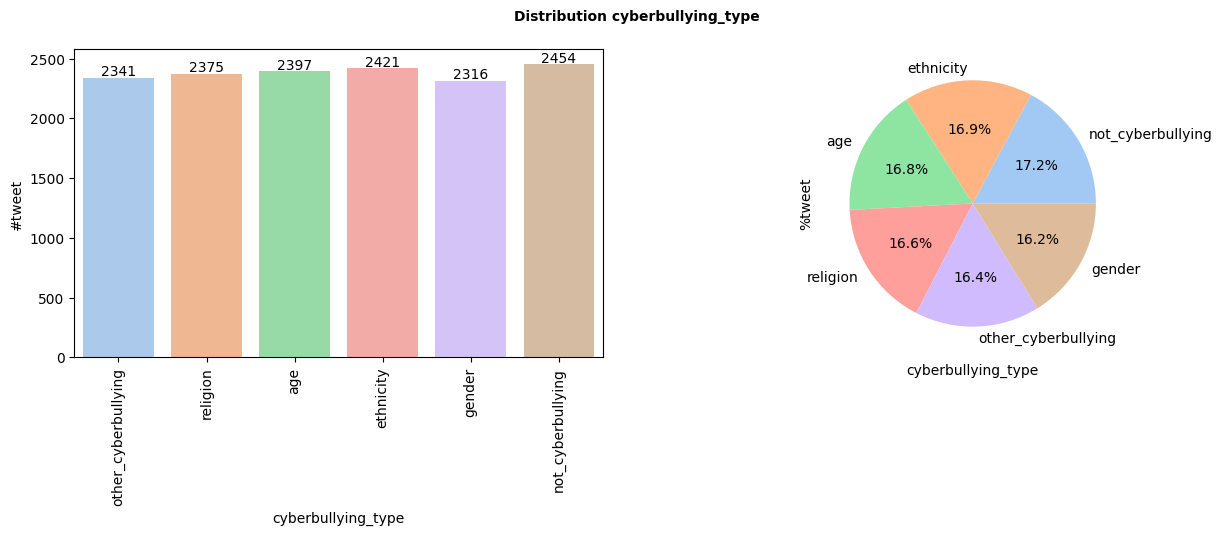

In [ ]:
# Membuat visualisasi Distribusi Tweet
fig, ax =plt.subplots(1,2,figsize=(15,4))

sns.countplot(x='cyberbullying_type', data=df_eda, palette="pastel", ax=ax[0])
ax[0].set_xlabel("cyberbullying_type", fontsize= 10)
ax[0].set_ylabel("#tweet", fontsize= 10)
fig.suptitle('Distribution cyberbullying_type', fontsize=10, fontweight='bold')

ax[0].tick_params(axis='x', rotation=90)
plt.xlabel("cyberbullying_type", fontsize= 10)
plt.ylabel("#tweet", fontsize= 10)

for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 10)

df_eda['cyberbullying_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors = sns.color_palette('pastel')[0:7], textprops = {"fontsize":10})
ax[1].set_ylabel("%tweet", fontsize= 10)
plt.show()

Observasi:
- Berdasarkan distribusi tersebut, tiap tipe kategori hampir memiliki persentase persebaran yang sama ~ 16.8% (~ 2300 tweet)

### 4-3 Sample Tweets

Untuk mengetahui pola dari kalimat dan kata pada tweets yang sedang ditinjau, perlu dilakukan sampling untuk masing-masing kategori.

In [ ]:
#print sample tweet untuk masing-masing kategori
pd.set_option('display.width', None)
sampleNB = df_eda[df_eda['cyberbullying_type']=='not_cyberbullying'].sample(n=1005)
# Print Sample Not Bullying
print('Sample Not Bullying')
print('-'*100)
for i in range(0,5):
    print(sampleNB.iloc[i,0])
print('-'*100)


sampleG = df_eda[df_eda['cyberbullying_type']=='gender'].sample(n=1000)
# Print Sample Gender Bullying
print('Sample Gender')
print('-'*100)
for i in range(0,5):
    print(sampleG.iloc[i,0])
print('-'*100)

sampleR = df_eda[df_eda['cyberbullying_type']=='religion'].sample(n=1000)
# Print Sample Religion Bullying
print('Sample Religion')
print('-'*100)
for i in range(0,5):
    print(sampleR.iloc[i,0])
print('-'*100)

sampleo = df_eda[df_eda['cyberbullying_type']=='other_cyberbullying'].sample(n=1000)
# Print Sample Other Bullying
print('Sample Other')
print('-'*100)
for i in range(0,5):
    print(sampleo.iloc[i,0])
print('-'*100)
samplea = df_eda[df_eda['cyberbullying_type']=='age'].sample(n=1000)
# Print Sample Age Bullying
print('Sample Age')
print('-'*100)
for i in range(0,5):
    print(samplea.iloc[i,0])
print('-'*100)

samplee = df_eda[df_eda['cyberbullying_type']=='ethnicity'].sample(n=1000)
# Print Sample Ethnicity Bullying
print('Sample Ethnicity')
print('-'*100)
for i in range(0,5):
    print(samplee.iloc[i,0])
print('-'*100)

Sample Not Bullying
----------------------------------------------------------------------------------------------------
@CoralineAda i like you.
Don't get this dessert :/ lol #MKR
Now that movies a classic
guess who I am: WE HATE STRATEGIC SCORING BUT WE GIVE THEM A 1 #mkr
RT @safinostrongman: 15 peshmerga surrounded by hundreds of daesh fought for 8 hours untill they got rescued, unfortunally 4 of them got ma…
----------------------------------------------------------------------------------------------------
Sample Gender
----------------------------------------------------------------------------------------------------
@dylansdelena rape jokes, suicide jokes, calling girls cunts, fat, ugly, etc. said lesbians aren't really gay, that they choose to be gay...
RT @king_dani3 Guys be better then women in everything !! Not sexist but it's just coz we are competitive as hell
If only this Sasquatch had wings to help these girls fly out of the whole they've dug for themselves #mkr @mykitc

Berdasaran sample tersebut, dapat disimpulkan bahwa:
- Kalimat dan kata tersebut perlu diubah ke lowercase agar konsisten
- terdapat data *https:* pada sample kalimat tersebut, sehingga perlu dihilangkan.
- terdapat banyak emoticon dan simbol matematika sehingga perlu dihandle karena karakter-karakter tersebut tidak dapat diproses oleh nlp dan tidak mempengaruhi arti dari tweet tersebut.
- Whitespace, . ....',"?! perlu dihilangkan karena tidak mempengaruhi arti dari tweet/text yang diproses.

### 4-4 Visualisasi Tweet dan Kategori Tweet

**1. Wordcloud Keseluruhan Tweet**

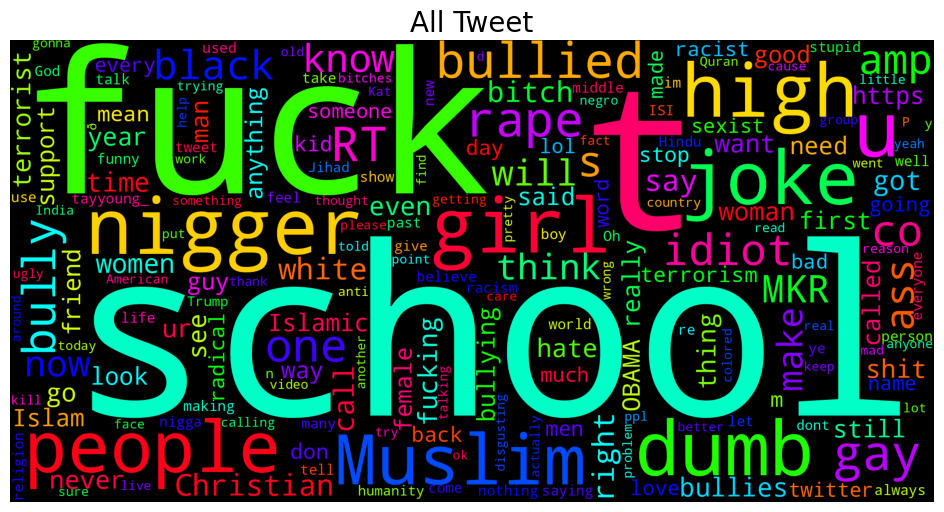

In [ ]:
#1.wordcloud keseluruhan tweet
all_tweet = df_eda.tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(all_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("All Tweet",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#2. Tampilkan frekuensi kata terbanyak
df_eda['tweet_list'] = df_eda['tweet_text'].apply(lambda x:str(x).split())
most_all = Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_all.most_common(100))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39   40   41    42   43    44   45  \
Words    RT  people  just  your    so   at    u   by  fuck   or  rape   if   
Count  1207    1189  1184  1170  1094  992  952  947   928  910   893  862   

        46     47    48   49    50   51     52   53   54    55   56   57   58  \
Words  one  bully  when   do  from   he  &amp;  get  The  what  gay  ass   an   
Count  848    832   828  823   821  816    787  780  779   772  769  763  757   

        59   60      61     62     63   64   65    66     67   68       69  \
Words  You   up  nigger  being  don't  can   we  girl  girls  out  because   
Count  755  750     731    714    699  695  695   692    691  687      686   

          70   71   72   73   74    75    76    77     78     79     80   81  \
Words  their   no  I'm  she  her  will  know  them  would  think  jokes  how   
Count    680  671  669  664  662   641   630   624    596    588    577  570   

          82   83    84   85    86   87    88     89    90    91    92  \
Words  black  his  were  has  it's  got  make  white  call  FUCK  only   
Count    566  553   537  536   480  478   456    454   451   448   448   

           93   94    95   96    97   98   99  
Words  Muslim  now  some  say  even  see  And  
Count     442  440   440  436   422  415  414

Observasi:

- Terdapat beberapa kata-kata dominan diantaranya school, fuck, t, bully, joke, nigger, gay, high, dumb, muslim, hingga rape, dll
- terdapat past tense (v2/v3) sehingga perlu diubah ke dalam bentuk awal (V1)
- berdasarkan frekuensi kata terbanyak, kata-kata tidak berarti didominasi oleh kata dengan total karakter dibawah 3.

**2. Wordcloud Kategori `cyberbully_type:Not Bullying`**

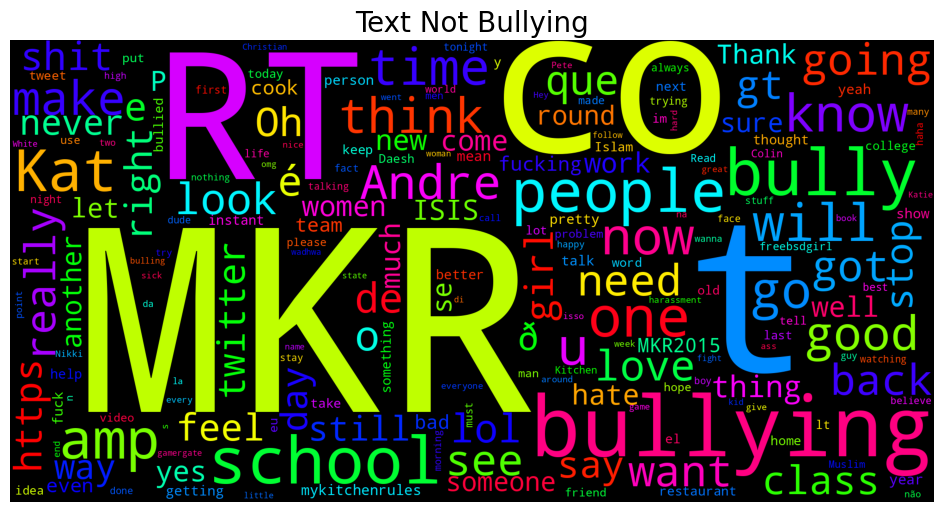

In [ ]:
#1.wordcloud keseluruhan tweet
not_bullying = df_eda[df_eda['cyberbullying_type'] == 'not_cyberbullying'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(not_bullying))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("Text Not Bullying",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
notbully_eda = df_eda[df_eda['cyberbullying_type']=='not_cyberbullying']
common_notbully = Counter([item for sublist in notbully_eda['tweet_list'] for item in sublist])
most_notbully= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_notbully.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adlaah MKR, RT, CO, t, co.
- terdapat link website pada kategori ini, sehingga perlu dihilangkan.
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet. Sehingga kata-kata tersebut perlu dihilangkan.
- berdasarkan frekuensi kata terbanyak, kata-kata tidak berarti didominasi oleh kata dengan total karakter dibawah 3.

** 2. Wordcloud Kategori `cyberbully_type:Gender`**

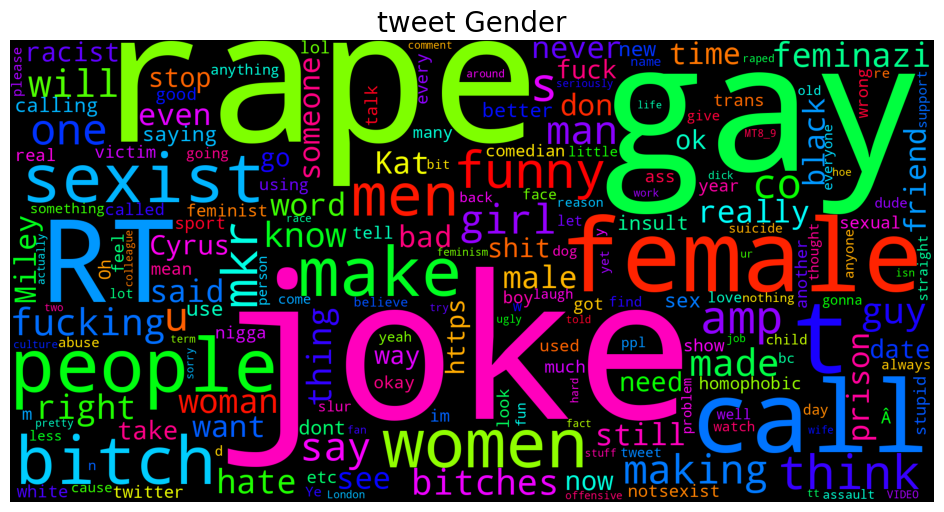

In [ ]:
#1.wordcloud keseluruhan tweet
gender_tweet = df_eda[df_eda['cyberbullying_type'] == 'gender'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(gender_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Gender",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
gender_eda = df_eda[df_eda['cyberbullying_type']=='gender']
common_notbully = Counter([item for sublist in notbully_eda['tweet_list'] for item in sublist])
most_gender= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_gender.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adalah joke, gay, rape, women, people, female, call, bitch, dll
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet, seperti RT, t, lol, dll. Sehingga kata-kata tersebut perlu dihilangkan.
- berdasarkan frekuensi kata terbanyak, kata-kata tidak berarti didominasi oleh kata dengan total karakter dibawah 3.

**3. Wordcloud Kategori `cyberbully_type:Religion`**

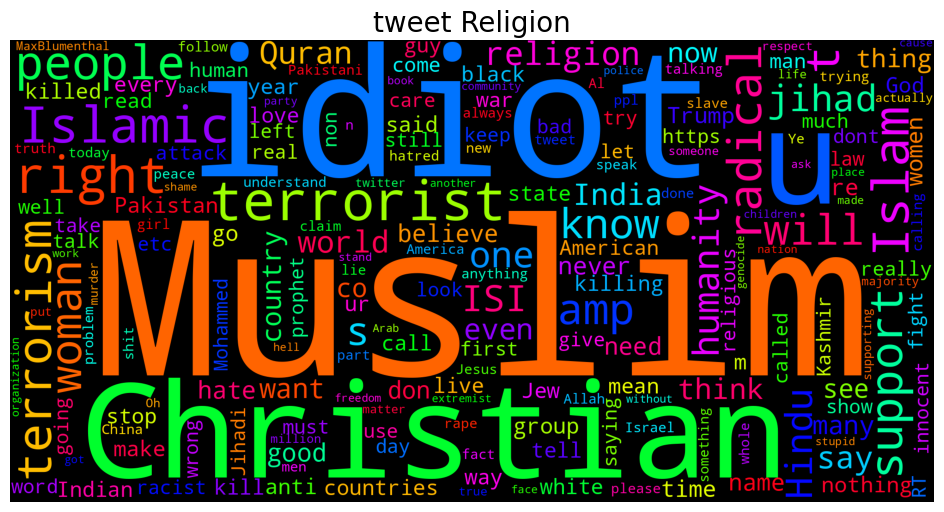

In [ ]:
#1.wordcloud keseluruhan tweet
religion_tweet = df_eda[df_eda['cyberbullying_type'] == 'religion'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(religion_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Religion",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
religion_eda = df_eda[df_eda['cyberbullying_type']=='religion']
common_religion = Counter([item for sublist in religion_eda['tweet_list'] for item in sublist])
most_religion= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_religion.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adalah idiot, muslim, terrorism, islamic, christian, islam, dll
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet, seperti RT, u, lol, dll. Sehingga kata-kata tersebut perlu dihilangkan.
- berdasarkan frekuensi kata terbanyak, kata-kata tidak berarti didominasi oleh kata dengan total karakter dibawah 3.

**4. Wordcloud Kategori `cyberbully_type : other_cyberbullying`**

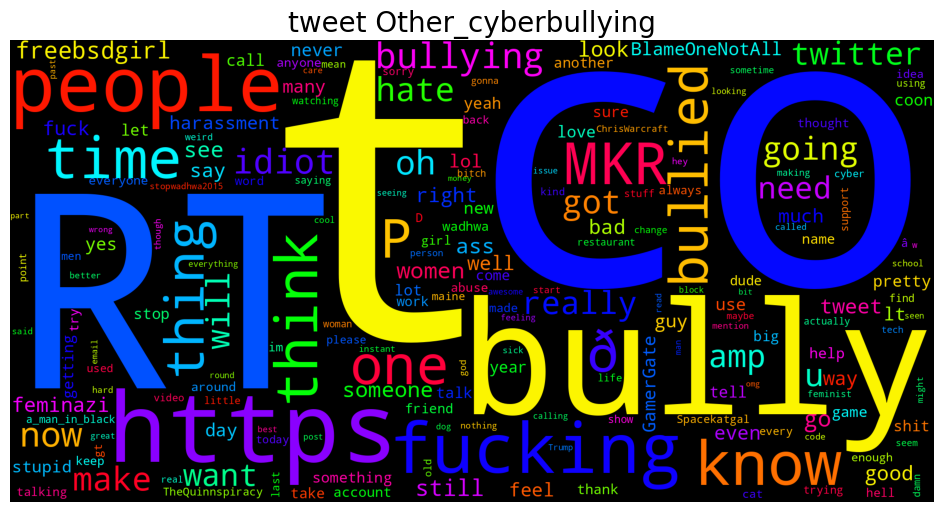

In [ ]:
#1.wordcloud keseluruhan tweet
other_tweet = df_eda[df_eda['cyberbullying_type'] == 'other_cyberbullying'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(other_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Other_cyberbullying",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
other_cyberbulling_eda = df_eda[df_eda['cyberbullying_type']=='other_cyberbulling']
common_other_cyberbulling = Counter([item for sublist in other_cyberbulling_eda['tweet_list'] for item in sublist])
most_other_cyberbulling= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_other_cyberbulling.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adalah cot, t, bully, rt, bully, https, people, dll
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet, seperti D, P, oh, a,dll. Sehingga kata-kata tersebut perlu dihilangkan.
- Terdapat website https yang tidak mempengaruhi makda dari tweet, sehingga website tersebut harus dihilangkan.
- terdapat past tense (V2/v3/v1+ing, v1+e/es) seperti going, using, though, bullying, dll. Karena tidak mempengaruhi makna dari tweet, sehingga sebaiknya dihilangkan.
- berdasarkan frekuensi kata terbanyak, kata-kata tidak berarti didominasi oleh kata dengan total karakter dibawah 3.

**5. Wordcloud Kategori `cyberbully_type : Age`**

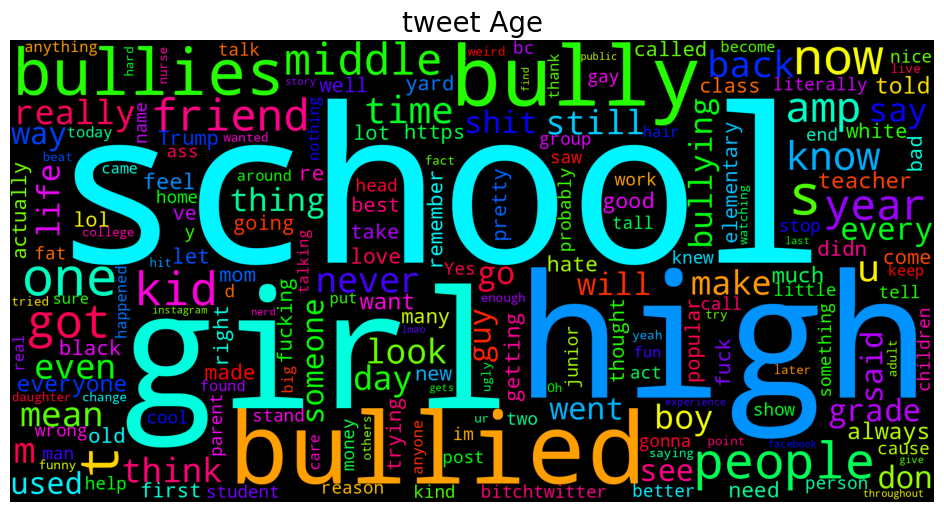

In [ ]:
#1.wordcloud keseluruhan tweet
age_tweet = df_eda[df_eda['cyberbullying_type'] == 'age'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(age_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Age",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
age_eda = df_eda[df_eda['cyberbullying_type']=='age']
common_age = Counter([item for sublist in age_eda['tweet_list'] for item in sublist])
most_age= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_age.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adalah high, school, girl, bullied, bully, dll
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet, sepertidon, oh, re, d, t, dll. Sehingga kata-kata tersebut perlu dihilangkan.
- terdapat past tense (V2/v3/v1+ing, v1+e/es) sepertibullied, bullies, fucking, bullying, dll. Karena tidak mempengaruhi makna dari tweet, sehingga sebaiknya dihilangkan.

**6. Wordcloud Kategori `cyberbully_type : ethnicity`**

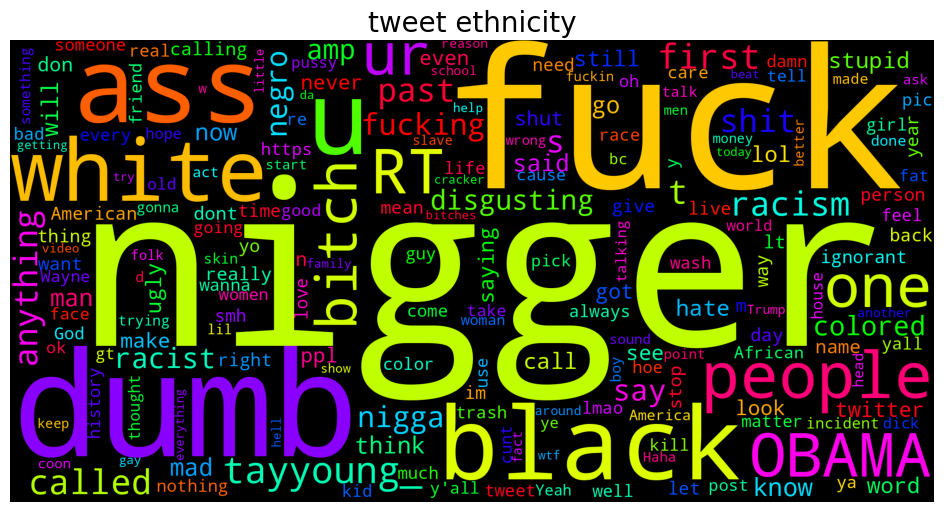

In [ ]:
#1.wordcloud keseluruhan tweet
ethnicity_tweet = df_eda[df_eda['cyberbullying_type'] == 'ethnicity'].tweet_text.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(ethnicity_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet ethnicity",fontsize=20)
plt.imshow(cloud_all)

In [ ]:
#Tampilkan frekuensi kata terbanyak
ethnicity_eda = df_eda[df_eda['cyberbullying_type']=='ethnicity']
common_ethnicity= Counter([item for sublist in ethnicity_eda['tweet_list'] for item in sublist])
most_ethnicity= Counter([item for sublist in df_eda['tweet_list'] for item in sublist])
mostcommon = pd.DataFrame(most_ethnicity.most_common(40))
mostcommon.columns = ['Words','Count']
mostcommon.T

0     1     2     3     4     5     6     7     8     9     10    11  \
Words   the    to     a   and     I    of   you    in    is  that   are   for   
Count  8294  6893  6802  5885  4799  4428  4305  4296  3808  3045  2549  2440   

           12    13    14    15    16    17    18    19    20    21    22  \
Words  school   was    me   not    my    it    on  like    be   but  with   
Count    2018  2002  1834  1823  1779  1751  1710  1609  1561  1492  1482   

          23    24    25    26    27    28    29    30    31    32       33  \
Words  about   who  have  this  high  they  dumb     i    as   all  bullied   
Count   1466  1438  1405  1398  1396  1359  1348  1272  1272  1258     1253   

         34      35    36    37    38   39  
Words    RT  people  just  your    so   at  
Count  1207    1189  1184  1170  1094  992

Observasi:
- Kata-kata yang mendominasi kategori ini adalah fuck, nigger, white, dumb, obama, bitch, dll
- Terdapat banyak kata yang terdiri dari 3 kebawah yang tidak berarti maupun mempengaruhi tweet, seperti tayyoung_, rt, u, pic, don  dll. Sehingga kata-kata tersebut perlu dihilangkan.
- terdapat past tense (V2/v3/v1+ing, v1+e/es) seperti colored, called, disgusting, dll. Karena tidak mempengaruhi makna dari tweet, sehingga sebaiknya dihilangkan.

## 5 - Pre-Processing

#### 5-1 Teks Pre-processing

Selanjutnya dilakukan pre-processing untuk membersihkan dan menghilangkan karakter-karaketer yang tidak memiliki pengaruh dan arti dalam pemodelan data.

Setelah melakukan EDA, dapat disimpulkan bahwa proses pre-preprocessing yang akan dilakukan diantaranya:

1. **Mengubah kalimat/kata ke huruf kecil `lowercase`** dimaksudkan agar data yang dimodelkan lebih seragam dan untuk mengurangi banyaknya kata unik yang tidak memiliki arti yang sama.

2. **Menghilangkan emoticon dan simbol matematika** karena hal tersebut tidak bisa diproses dalam nlp dan maknanya tidak terlalu berpengaruh pada tweet.

3. **Menghilangkan website** karena tidak memiliki makna yang berarti terhadap tweet.

4. **Menghilangkan whitespace, new line, mention dan hashtag** karena tidak akan mempengaruhi kalimat pada tweet

5. **lakukan lemmatizer**untuk mengembalikan kata kedalam bentuk awalnya.

6. **Hilangkan tambahan** kata stopwords seperti like, don, ll, y, u, ur, o, will, shall, re, de, kat, e, bc,wa, amp. Semua kata yang kurang dari 3 akan dihilangkan.
7. Word Tokenizer digunakan untuk memisahkan kalimat menjadi 1 kata-kata yang terkombinasi.

In [ ]:
# Additional Stopwords
stopwords_add = ['rt', 'mkr', 'didn', 'bc', 'n', 'm','im', 'll', 'y', 've', 'u', 'ur', 'don', 'p', 't', 's', 'aren', 'kp', 'o', 'kat','de', 're', 'amp', 'will', 'wa', 'e', 'like', 'andre', 'na', 're', 'lil', 'd', 'na', 'pete', 'annie', 'nikki', 'lmao', 'miley', 'wan', 'gon']

In [ ]:
# Setting stopwords english
stpwds_eng = list(set(stopwords.words('english')))
for i in stopwords_add:
    stpwds_eng.append(i)

In [ ]:
# Membuat fungsi cleaning

cleaning_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
lemmatizer = WordNetLemmatizer()


def text_proses(teks):

    # Mengubah Teks ke Lowercase
    teks = teks.lower()

    # Menghilangkan Link
    teks = re.sub(cleaning_pattern, ' ', teks)

    # Menghilangkan Mention
    teks = re.sub("@[A-Za-z0-9_]+", " ", teks)

    # Menghilangkan Hashtag
    teks = re.sub("#[A-Za-z0-9_]+", " ", teks)

    # Menghilangkan \n
    teks = re.sub(r"\\n", " ",teks)

    # Menghilangkan kata dibawah 3 char
    teks = re.sub(r'\b\w{1,3}\b', " ",teks)

    # Menghilangkan Whitespace
    teks = teks.strip()

    # Menghilangkan yang Bukan Huruf seperti Emoji, Gamma dll
    teks = re.sub("[^A-Za-z\s']", " ", teks)

    # Menghilangkan double space
    teks = re.sub("\s\s+" , " ", teks)

    # Melakukan Tokenisasi
    tokens = word_tokenize(teks)

    # Menghilangkan Stopwords
    teks = ' '.join([word for word in tokens if word not in stpwds_eng])

    # Melakukan Lemmatizer
    teks = lemmatizer.lemmatize(teks)


    return teks

In [ ]:
#terapkan pada df
df_final = df.copy()
df_final['tweet_processed'] = df_final['tweet_text'].apply(lambda x: text_proses(x))
df_final

tweet_text   cyberbullying_type  \
0      If cats looked like frogs we'd realize what na...  other_cyberbullying   
1                      10/10 Christian woman right there             religion   
2      Every girl who bullied me in high school for b...                  age   
3      I remember when these three girls bullied me o...                  age   
4      Thank you to everyone at #GirlDevWeek for the ...  other_cyberbullying   
...                                                  ...                  ...   
14303    @GOLD_blues ' I anit had school today lilbruh .    not_cyberbullying   
14304  @mutaSawwif If you don't like hate then you wi...             religion   
14305    RT @coil780: @freebsdgirl #disappointwadhwa2015  other_cyberbullying   
14306  i had a dream... that mRobin (of the nintendo ...                  age   
14307  You give off popular girl who bullied the nerd...                  age   

                                         tweet_processed  
0      cats looked frogs realize nasty cruel little a...  
1                                  christian woman right  
2      every girl bullied high school runs fitness he...  
3      remember three girls bullied high school datin...  
4      thank everyone girldevweek kind words thank le...  
...                                                  ...  
14303                          anit school today lilbruh  
14304                            hate rewrite half quran  
14305                  coil freebsdgirl disappointwadhwa  
14306  dream mrobin nintendo game fire emblem awakeni...  
14307  give popular girl bullied nerd high school tho...  

[14304 rows x 3 columns]

### 5-2 Mapping Label

In [ ]:
#mengubah data target menjadi numerik
label_encoder = LabelEncoder()
df_final['label'] = label_encoder.fit_transform(df_final['cyberbullying_type'])

#map label
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'other_cyberbullying': 4, 'religion': 5}


### 5-3 Split Data Train, Val, Test-Set

In [ ]:
# split data untuk masing-masing val, test, train

X_train_val, X_test, y_train_val, y_test = train_test_split(df_final['tweet_processed'], df_final['label'], test_size=0.15, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=10)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (10334,)
Val Size :  (1824,)
Test Size :  (2146,)


## 5-4 Tokenization

In [ ]:
#ambil vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<10334x18325 sparse matrix of type '<class 'numpy.int64'>'
	with 106972 stored elements in Compressed Sparse Row format>

In [ ]:
#selanjutnya cari jumlah dan panjang token

num_vocab = len(Vectorize.vocabulary_.keys())
max_sentence = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocabularies:", num_vocab)
print("Panjang maksimum kalimat:", max_sentence, "kata")

Jumlah vocabularies: 18325
Panjang maksimum kalimat: 72 kata


Observasi:
- Didapatkan bahwa jumlah vocab pada tweet_text adalah sebanyak 18.325. Sementara panjang maksimum kalimat adalah 72 kata.

## 5-5 Target Encoding

In [ ]:
# Mengubah Target ke dalam One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
#tampilkan data train
y_train_ohe

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#tampilkan data test
y_test_ohe

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#tampilkan val
y_val_ohe

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

## 6- Exploratory Data Analysis (EDA)

### 6-1 Jumlah Kata dan Kalimat

In [ ]:
#buat kolom baru untuk menghitung jumlah kata
df_eda['len_words'] = df_eda['tweet_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_final['len_words'] = df_final['tweet_processed'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
#Hitung jumlah kata dan kalimat sebelum dan sesudah preprocessing
print('Max kata (sebelum)', df_eda['len_words'].max())
print('Max kata (sesudah)', df_final['len_words'].max())

print('-'*50)
print('Mean kata (sebelum) ', round(df_eda['len_words'].mean(),2))
print('Mean kata (sesudah) ', round(df_final['len_words'].mean(),2))
print('-'*50)
print('Persentase (sebelum) ',round((df_final['len_words'].max()/df_eda['len_words'].max()*100),2))
print('Persentase(sesudah)',round((df_final['len_words'].mean()/df_eda['len_words'].mean()*100),2))

Max kata (sebelum) 396
Max kata (sesudah) 160
--------------------------------------------------
Mean kata (sebelum)  28.71
Mean kata (sesudah)  10.88
--------------------------------------------------
Persentase (sebelum)  40.4
Persentase(sesudah) 37.91


Observasi:

- Terdapat perbedaan setelah dilakukan cleaning kata pada pre-processing.
- kata yang awalnya memiliki persentase sebesar 40% mengalami penurunan hingga 37.91% dengan rata-rata kata menurun hingga 18 kata.  

### 6-2 Visualisasi Tweet dan Kategori Tweet

Menampilkan keseluruhan datas setelah di pre-processing

**1. Wordcloud Keseluruhan Tweet**

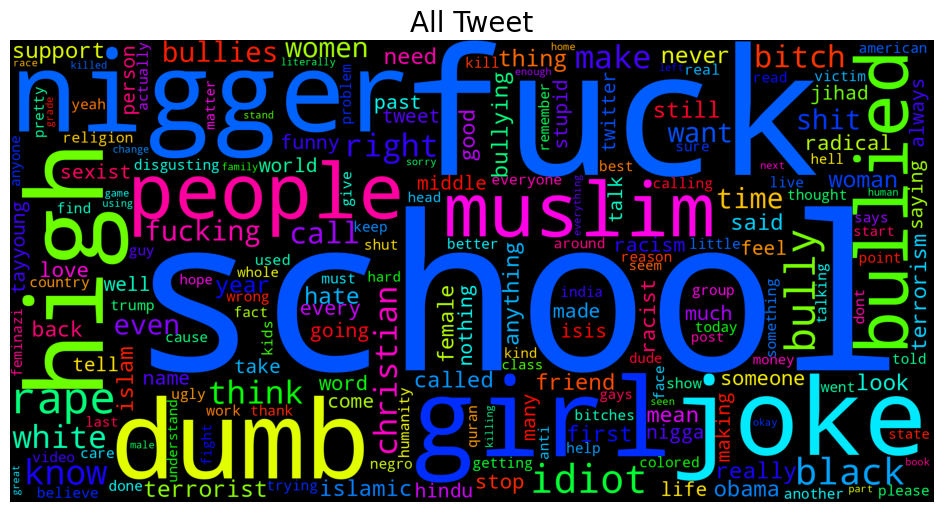

In [ ]:
#1.wordcloud keseluruhan tweet
all_tweet = df_final.tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(all_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("All Tweet",fontsize=20)
plt.imshow(cloud_all)

Observasi:

- kata-kata yang mendominasi pada tweet keseluruhan adalah school, dumb, muslim (religion), nigger(ethnicity), girl(gender), dll.

**2. Wordcloud Kategori `cyberbully_type:Not Bullying`**

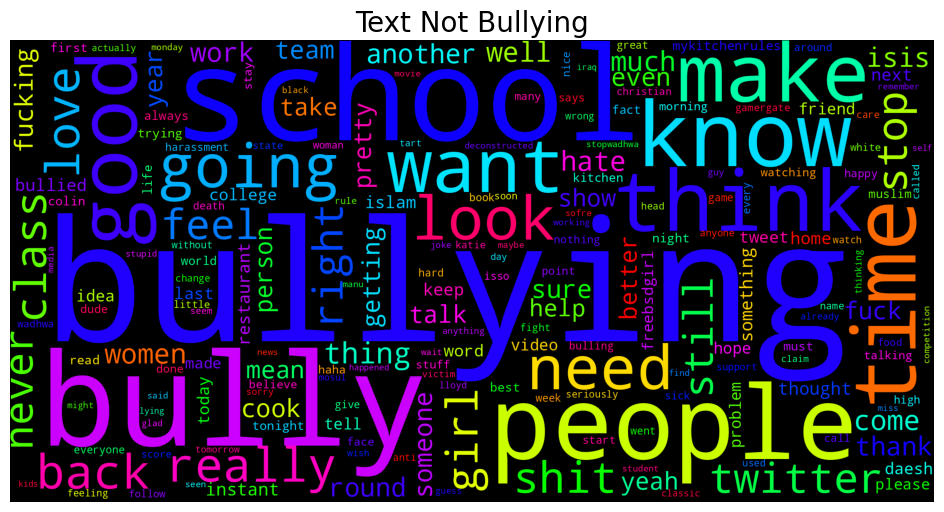

In [ ]:
#1.wordcloud keseluruhan tweet
not_bullying = df_final[df_final['cyberbullying_type'] == 'not_cyberbullying'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(not_bullying))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("Text Not Bullying",fontsize=20)
plt.imshow(cloud_all)

Observasi:
- bullying, school, think, know, time, people mendominasi kategori not_bullying. Kemungkinan pada kategori ini tweetnya mengucilkan/memberi awareness mengenai bullying.

**2. Wordcloud Kategori `cyberbully_type:Gender`**

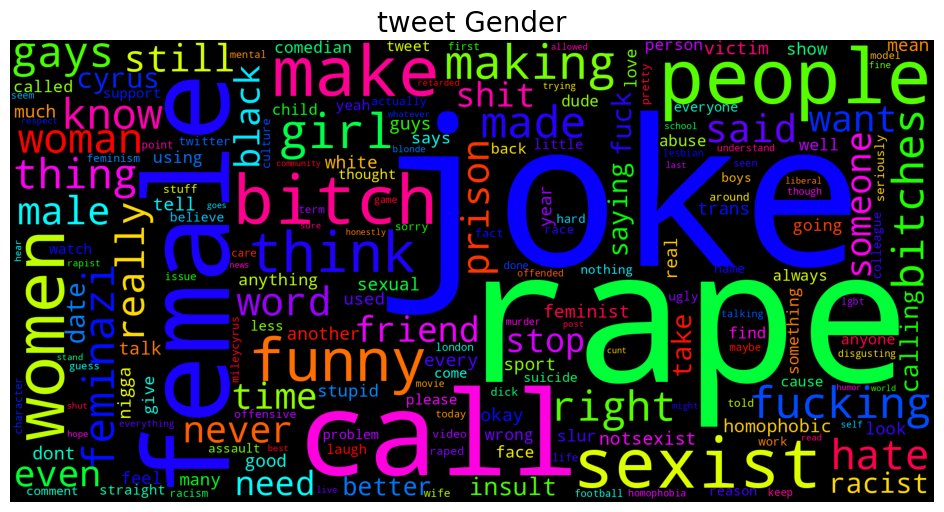

In [ ]:
#1.wordcloud keseluruhan tweet
gender_tweet = df_final[df_final['cyberbullying_type'] == 'gender'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(gender_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Gender",fontsize=20)
plt.imshow(cloud_all)

Observasi:
- joke, rape, call, sexist mendominasi tweet pada kategori ini. Gender pada kategori ini lebih mengarah kepada penghinaan kepada wanita. Hal ini berarti tweets ini kebanyakan dituliskan oleh laki-laki.

**3. Wordcloud Kategori `cyberbully_type:Religion`**

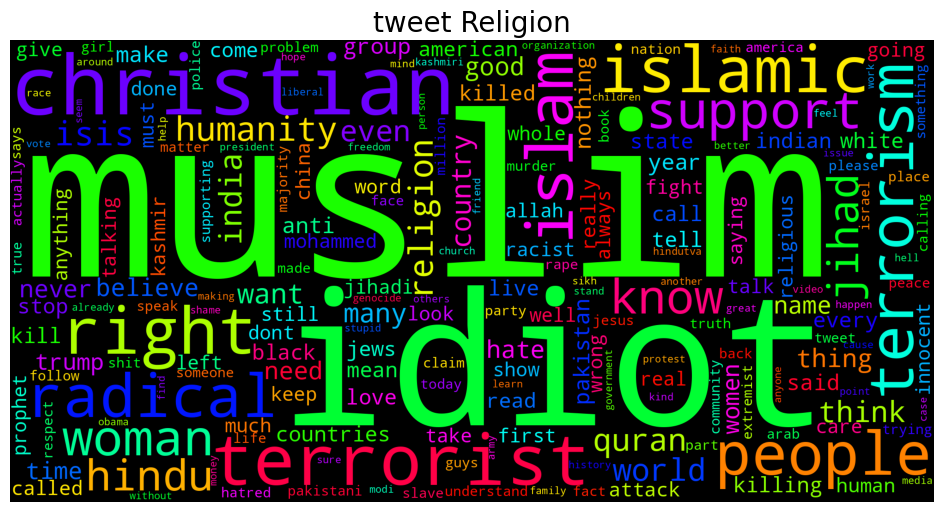

In [ ]:
#1.wordcloud keseluruhan tweet
religion_tweet = df_final[df_eda['cyberbullying_type'] == 'religion'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(religion_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Religion",fontsize=20)
plt.imshow(cloud_all)

Observasi:
- muslim, idiot, terrorist, islmaic, terorism, radical, christian. Kategori ini lebih banyak dilakukan kepada agama islam dan segala sesuatu yang berhubungan dengan islam.

**4. Wordcloud Kategori `cyberbully_type : other_cyberbullying`**

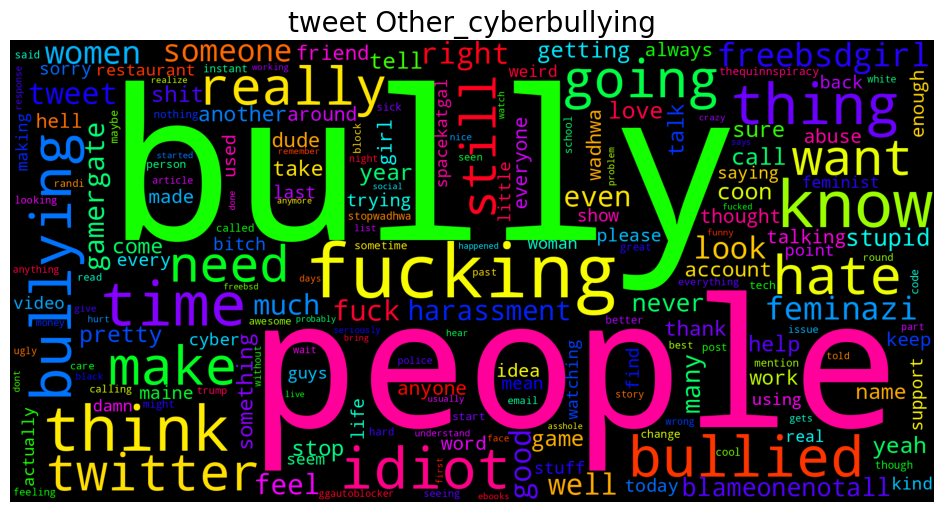

In [ ]:
#1.wordcloud keseluruhan tweet
other_tweet = df_final[df_final['cyberbullying_type'] == 'other_cyberbullying'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(other_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Other_cyberbullying",fontsize=20)
plt.imshow(cloud_all)

Observasi:
- Kata-kata yang mendominasi kategori ini adalah bully, people, idiot, think dan time, gamergame
- hal ini dapat diartikan bahwa pada other_cyberbullying kategori ini lebih sering berbicara mengenai game, polisi, pekerjaan dll.

**5. Wordcloud Kategori `cyberbully_type : Age`**

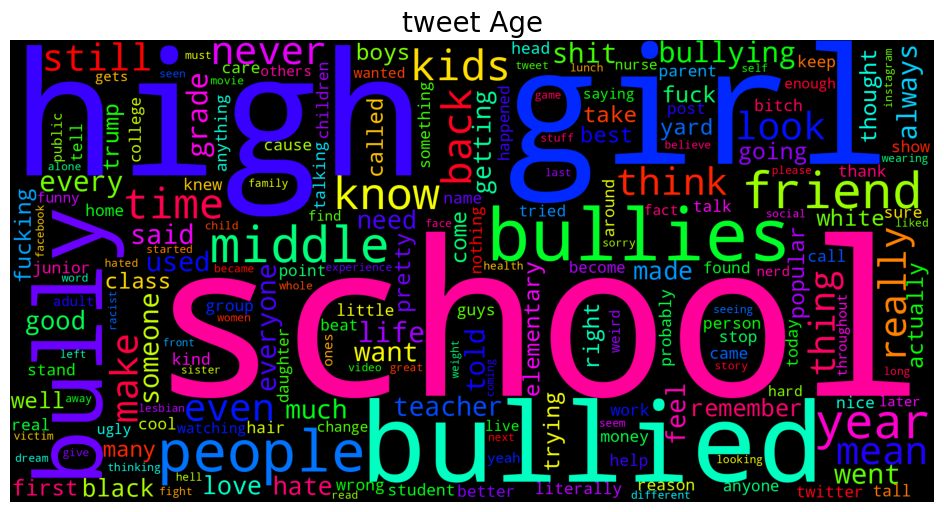

In [ ]:
#1.wordcloud keseluruhan tweet
age_tweet = df_final[df_final['cyberbullying_type'] == 'age'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(age_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet Age",fontsize=20)
plt.imshow(cloud_all)

Observasi:

- Berdasarkan wordcloud tersebut, kata-kata school, high, girl, bullied, kids merupakan kata-kata yang didominasi pada kategori ini.
- hal ini menunjukkan bahwa jenjang sekolah dan  gender sering sekali dijadikan sebagai ejekan.

**6. Wordcloud Kategori `cyberbully_type : ethnicity`**

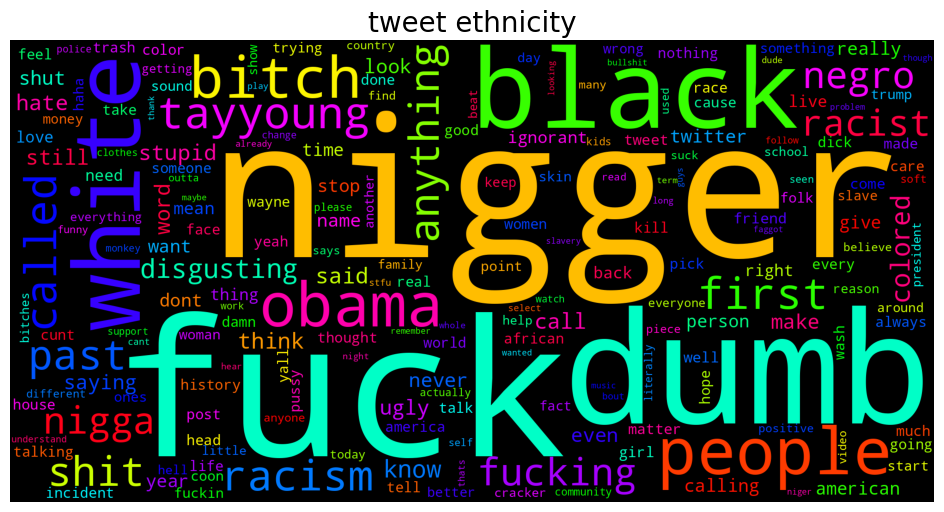

In [ ]:
#1.wordcloud keseluruhan tweet
ethnicity_tweet = df_final[df_final['cyberbullying_type'] == 'ethnicity'].tweet_processed.values
cloud_all = WordCloud(background_color='black',colormap="hsv_r",collocations=False,width=2000,height=1000).generate(" ".join(ethnicity_tweet))

#2. Tampilkan wordcloud
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.title("tweet ethnicity",fontsize=20)
plt.imshow(cloud_all)

Observasi:
- pada kategori ethnicity, kata-kata tweet yang paling sering muncul adalah nigger, fuck, dumb black, white, people, obama
- Terlihat bahwa tweet lebih sering menargetkan orang-orang Afrika-Amerika (black people di Amerika)

## 7- Model Definition

### 7-1 Algoritma dan Metrics

Pada analisis ini, model akan menggunakan algoritma LSTM dan GRU.
- LSTM (long short term memory) adalah jenis arsitektur RNN (recurrent Nueral Network) yang bekerja dengan menambahkan memory cell yang dapat menyimpan informasi untuk jangka waktu yang lama.
  - algoritma ini sangat populer, memiliki training time yang cepat dan cocok untuk dataset yang jumlahnya besar.
- GRU (Gated Recurrent Unit) digunakan karena komputasi pemprosesannya lebih sederhana dan sebagai pembanding LSTM


- Metrics yang digunakan diantarannya:
  - Recall: digunakan karena dataset cyberbullying_tweet merupakan data klasifikasi dengan tujuan untuk tweet yang dikirim seseorang masuk kedalam kategori cyberbullying yang mana?. Kesalahan dalam mengklasifikasikan variabel tersebut dapat menyebabkan meningkatnya jumlah komplain dari user kepada pihak perusahaan twitter.

  - ROC-AUC: digunakan karena dataset yang digunakan imbalanced. Sehingga perlu diketahui apakah model yang dibuat berpengaruh terhadap threshold atau tidak.

- Acceptable score: 80%, pertengahan dari skor ideal yang diterima perusahaan([reference](https://www.obviously.ai/post/machine-learning-model-performance#:~:text=But%20in%20our%20opinion%2C%20anything,also%20consistent%20with%20industry%20standards.))

### 7-2 Pipeline TensorFlow

Urutan pipeline yang digunakan pada analisis ini didasarkan dari [Best Ordering](https://stackoverflow.com/questions/49915925/output-differences-when-changing-order-of-batch-shuffle-and-repeat#:~:text=Best%20Ordering%3A&text=For%20batches%20to%20be%20different,are%20unique%2C%20unlike%20the%20other.), yaitu:
1. shuffle (20%) dari dataset
2. repeat (2): hanya dilakukan 2 kali pengulangan
3. batch (32): menggunakan inisialisasi terkecil dari 32/64/128/256

In [ ]:
# Definisi Pipeline Train dan Val
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train_ohe)).shuffle(int(round(len(X_train)*20/100,0))).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val_ohe)).shuffle(int(round(len(X_val)*20/100,0))).batch(32)


## 8 - Model LSTM

Sebelum melakukan modeling, berikut adalah rules Model LSTM:

- Menggunakan sequencial API karena lebih simple dan hanya bekerja 1 arah sesuai urutan
- Hidden layer inisialisasi: 3 karena dataset cukup banyak. [`ref:choosing hidden layers`]('https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/')
  - Hiden layer 1: dense(32)
  - Hidden layer 2: dense(16)
  - Hiden layer 3: dense(8)

- activation (softmax) karena cepat konvergen dan digunakan untuk model multi-class
- input shape: 1 karena hanya memiliki 1 input `tweet text`
- output dense: 6 sesuai dengan jumlah kategori outputnya
- loss: categorical_crossentropy karena yang ditinjau adalah data kategorikal
- optimizer (adam) karena cepat konvergen
- ngrams= none untuk baseline

### 8-1 Model Training

In [ ]:
# 0. Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Text Vectorization Layer

text_vectorization = TextVectorization(max_tokens=num_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sentence,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [ ]:
# Text Vectorization Layer

text_vectorization = TextVectorization(max_tokens=num_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sentence,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [ ]:
# Embedding Layer

embedding_baseline = Embedding(input_dim=num_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sentence
                      )

In [ ]:
#tampilkan frekuensi 20 tertinggi

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'school',
 'fuck',
 'dumb',
 'high',
 'people',
 'bullied',
 'rape',
 'nigger',
 'bully',
 'jokes',
 'girl',
 'black',
 'girls',
 'muslim',
 'muslims',
 'know',
 'would',
 'white']

Observasi:
- berdasarkan vektorisasi, kata school, fuck, dumb, high dan people adalah kata-kata yang paling sering digunakan.

In [ ]:
# Penyusunan Model
model_baseline = Sequential()

# Layer Text Vectorization
model_baseline.add(text_vectorization)

# Layer Embedding
model_baseline.add(embedding_baseline)

# Hidden Layer 1
model_baseline.add(LSTM(32, return_sequences=True))

# Hidden Layer 2
model_baseline.add(LSTM(16, return_sequences=True))

# Hidden Layer 3
model_baseline.add(LSTM(8))

# Layer Output
model_baseline.add(Dense(6,activation='softmax'))

# Compile
model_baseline.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 72)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 72, 128)           2345600   
                                                                 
 lstm (LSTM)                 (None, 72, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 72, 16)            3136      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 6)                 54        
                                                        

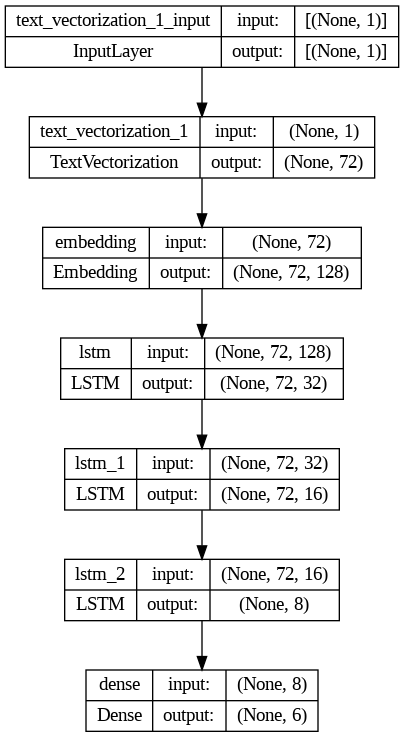

In [ ]:
#lakukan plot
tf.keras.utils.plot_model(model_baseline, show_shapes=True)

In [ ]:
#selanjutnya dilakukan training
model_baseline_hist = model_baseline.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
323/323 [==============================] - 45s 101ms/step - loss: 1.7927 - accuracy: 0.1598 - auc: 0.4951 - val_loss: 1.7930 - val_accuracy: 0.1721 - val_auc: 0.4870
Epoch 2/30
323/323 [==============================] - 10s 31ms/step - loss: 1.7920 - accuracy: 0.1626 - auc: 0.5057 - val_loss: 1.7937 - val_accuracy: 0.1453 - val_auc: 0.4820
Epoch 3/30
323/323 [==============================] - 7s 20ms/step - loss: 1.7920 - accuracy: 0.1661 - auc: 0.5013 - val_loss: 1.7927 - val_accuracy: 0.1721 - val_auc: 0.4959
Epoch 4/30
323/323 [==============================] - 7s 23ms/step - loss: 1.7919 - accuracy: 0.1640 - auc: 0.5031 - val_loss: 1.7925 - val_accuracy: 0.1721 - val_auc: 0.4928
Epoch 5/30
323/323 [==============================] - 5s 16ms/step - loss: 1.7919 - accuracy: 0.1664 - auc: 0.5012 - val_loss: 1.7923 - val_accuracy: 0.1721 - val_auc: 0.4928
Epoch 6/30
323/323 [==============================] - 6s 18ms/step - loss: 1.7919 - accuracy: 0.1632 - auc: 0.5022 - val_l

### 8-2 Evaluasi Model

In [ ]:
#buat dataframe

history_baseline_df = pd.DataFrame(model_baseline_hist.history)
history_baseline_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  1.791696  0.168860  0.501255  1.792226      0.172149  0.496162
26  1.791637  0.170505  0.504926  1.792554      0.172149  0.496162
27  1.791629  0.166634  0.502716  1.792451      0.172149  0.495934
28  1.791660  0.166925  0.503545  1.792531      0.172149  0.495969
29  1.791622  0.171279  0.503515  1.792481      0.172149  0.496490

<Axes: title={'center': 'Train vs Validation (Loss Function)'}>

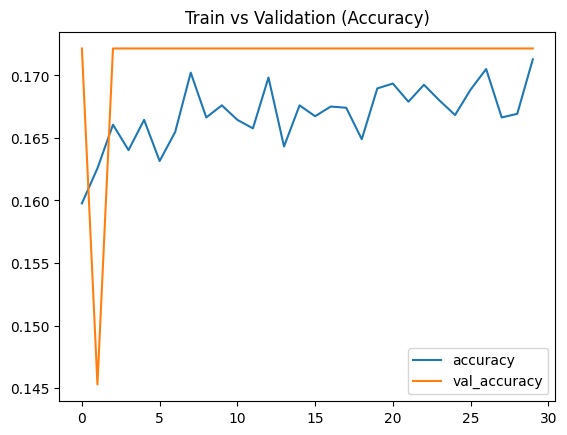

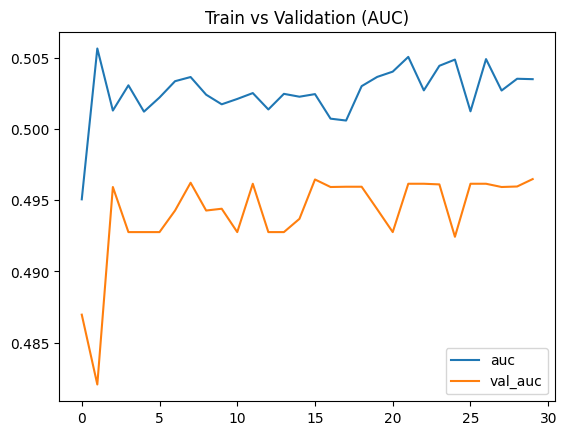

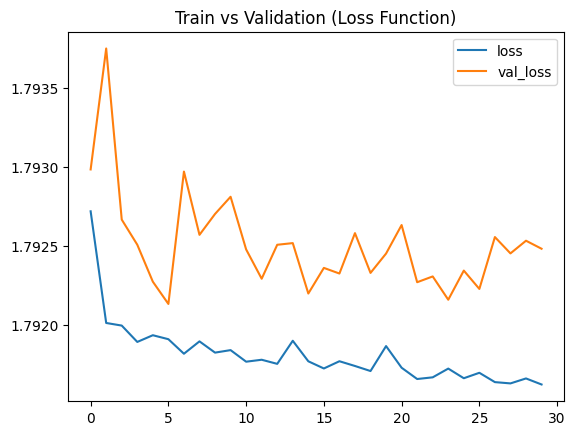

In [ ]:
# Plot Traning Results

history_baseline_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_baseline_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_baseline_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')


In [ ]:
# Model Evaluation of train-set
y_pred_train_baseline = np.argmax(model_baseline.predict(X_train), axis=-1)
print(classification_report(y_train, y_pred_train_baseline))

323/323 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1727
           1       0.00      0.00      0.00      1749
           2       0.00      0.00      0.00      1691
           3       0.17      1.00      0.29      1769
           4       1.00      0.00      0.00      1659
           5       0.00      0.00      0.00      1739

    accuracy                           0.17     10334
   macro avg       0.20      0.17      0.05     10334
weighted avg       0.19      0.17      0.05     10334



In [ ]:
# Perhitungan AUC
prob_baseline = model_baseline.predict(X_train)
auc_baseline = roc_auc_score(y_train, prob_baseline, multi_class='ovr')
auc_baseline

323/323 [==============================] - 2s 6ms/step


0.49143483533394594

Observasi:

- Berdasarkan gambar diatas, keseluruhan data menunjukkan adanya ketidakstabilan pada accuracy, AUC, dan loss pada train-set. Hal ini berarti terdapat gradient explode pada masing-masing set
- tingkat akurasi train sangat rendah yaitu hanya 17%.
- kategori recall paling tertinggi hanya 17% pada kategori `not_cyberbullying`, sementara kategori lainnya tidak bisa memprediksi dengan baik.
- Nilai AUC bernilai 0.49, sehingga dapat dikatakan bahwa model dipengaruhi oleh threshold.

In [ ]:
# Model Evaluation of test-set

y_pred_baseline = np.argmax(model_baseline.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred_baseline))

68/68 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.00      0.00      0.00       358
           2       0.00      0.00      0.00       327
           3       0.17      1.00      0.29       371
           4       0.00      0.00      0.00       350
           5       0.00      0.00      0.00       371

    accuracy                           0.17      2146
   macro avg       0.03      0.17      0.05      2146
weighted avg       0.03      0.17      0.05      2146



In [ ]:
# Perhitungan AUC
prob_baseline = model_baseline.predict(X_test)
auc_baseline = roc_auc_score(y_test, prob_baseline, multi_class='ovr')
auc_baseline



68/68 [==============================] - 0s 6ms/step


0.49222837098150446

Observasi:
- Karena model set yang sangat buruk, hasil dari test menghasilkan prediksi yang buruk juga.
- terlihat bahwa semua data memiliki akurasi pengelompokkan 0 kecuali `other_cyberbullying`

### 8-3 Analisis Model

In [ ]:
#membandingkan prediksi dengan aktual
act_pred_baseline = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_baseline)
})
df_act_pred_baseline = pd.concat([pd.DataFrame(X_test), act_pred_baseline],axis=1)
df_act_pred_baseline

tweet_processed  actual  prediction
7172   today society sensitive joke everything take j...       2           3
9239   difference calling black people coon calling b...       1           3
3799         expects unix logins github usernames rarely       4           3
12681  hurl girl went high school bullied married eve...       0           3
7251   going baltimore stupid fuck dumb niggers rioti...       1           3
...                                                  ...     ...         ...
2311   illuminati even branch called rape kill deny j...       2           3
1636   dear beloved legal department respectful bank ...       2           3
11756             jackleehi ions thanks evan nice source       3           3
9269   hahahaa well currently seeking mother figure e...       5           3
10975  wont renewing club membership support radical ...       5           3

[2146 rows x 3 columns]

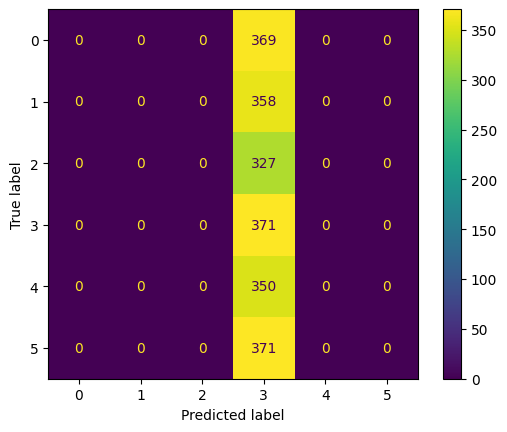

In [ ]:
# Confusion Matrix
cm_test_baseline = confusion_matrix(y_test, y_pred_baseline)
ConfusionMatrixDisplay(cm_test_baseline).plot()

Observasi:
- semua data terprediksi pada kategori 3 (not_cyberbullying)

## 9 - Model Improvement LSTM

Berdasarkan hasil pemodelan baseline LSTM, sehingga perlu dilakukan improvement dengan rule sebagai berikut:

- Terlihat dari hasil train, validation dan test bahwa model baseline memiliki score yang rendah yang berarti model kurang belajar sehingga akan ditambah 2 hidden layer.
- berdasarkan [machinelearningmastery]('https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/') penambahan layer bidirectional dapat meningkatkan performansi model karena layer tersebut akan membuat model belajar dari backward dan forward.

### 9-1 Model Training

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Penyusunan Model
imp_lstm = Sequential()

# Layer Text Vectorization
imp_lstm.add(text_vectorization)

# Layer Embedding
imp_lstm.add(embedding_baseline)

# Hidden Layer 1
imp_lstm.add(tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True)))


# Hidden Layer 2
imp_lstm.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True)))



# Hidden Layer 3
imp_lstm.add(tf.keras.layers.Bidirectional(LSTM(32,return_sequences=True)))


# Hidden Layer 4
imp_lstm.add(tf.keras.layers.Bidirectional(LSTM(16, return_sequences=True)))



# Hidden Layer 5
imp_lstm.add(tf.keras.layers.Bidirectional(LSTM(8)))



# Layer Output
imp_lstm.add(Dense(6,activation='softmax'))

# Compile
imp_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

from keras.callbacks import EarlyStopping

# Summary
imp_lstm.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 72)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 72, 128)           2345600   
                                                                 
 bidirectional (Bidirectiona  (None, 72, 256)          263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 72, 128)          164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 72, 64)           41216     
 nal)                                                   

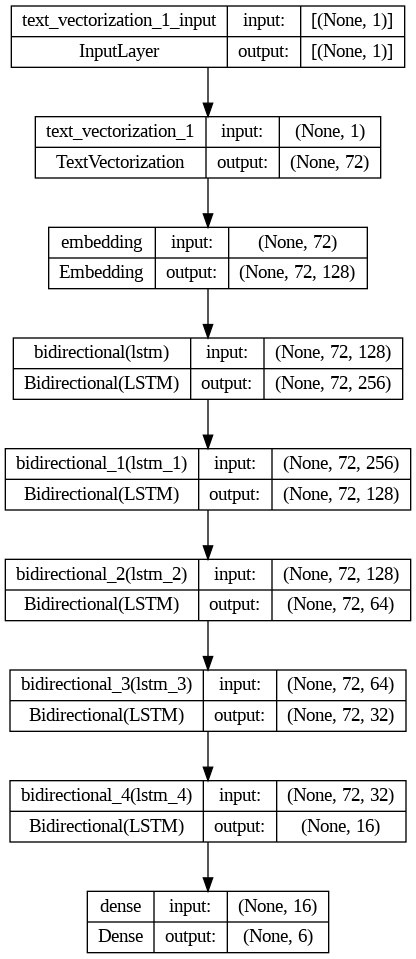

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(imp_lstm,show_shapes=True)

In [ ]:
# Train the Model
imp_lstm_hist = imp_lstm.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
323/323 [==============================] - 52s 105ms/step - loss: 0.9080 - accuracy: 0.6529 - auc: 0.9237 - val_loss: 0.6854 - val_accuracy: 0.7336 - val_auc: 0.9486
Epoch 2/30
323/323 [==============================] - 15s 48ms/step - loss: 0.5508 - accuracy: 0.7820 - auc: 0.9687 - val_loss: 0.5631 - val_accuracy: 0.7505 - val_auc: 0.9643
Epoch 3/30
323/323 [==============================] - 13s 40ms/step - loss: 0.3975 - accuracy: 0.8530 - auc: 0.9830 - val_loss: 0.5765 - val_accuracy: 0.7703 - val_auc: 0.9634
Epoch 4/30
323/323 [==============================] - 13s 39ms/step - loss: 0.3122 - accuracy: 0.8944 - auc: 0.9886 - val_loss: 0.7205 - val_accuracy: 0.7560 - val_auc: 0.9540
Epoch 5/30
323/323 [==============================] - 12s 38ms/step - loss: 0.2610 - accuracy: 0.9204 - auc: 0.9910 - val_loss: 0.7668 - val_accuracy: 0.7484 - val_auc: 0.9540
Epoch 6/30
323/323 [==============================] - 13s 39ms/step - loss: 0.2301 - accuracy: 0.9316 - auc: 0.9925 - v

### 9-2 Evaluasi Model

In [ ]:
# Create DataFrame

history_imp_lstm = pd.DataFrame(imp_lstm_hist.history)
history_imp_lstm.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  0.067101  0.974550  0.998347  1.344075      0.737390  0.893335
26  0.063301  0.975905  0.998805  1.292979      0.738487  0.898095
27  0.057426  0.976389  0.999069  1.375949      0.743969  0.890794
28  0.049321  0.976679  0.999202  1.391256      0.743421  0.890119
29  0.045582  0.979775  0.999238  1.553181      0.731908  0.881853

(0.0, 3.0)

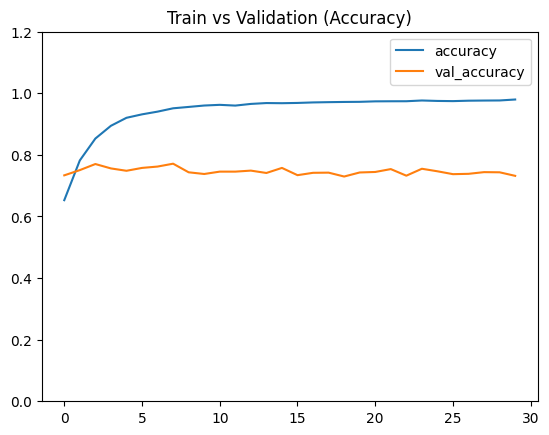

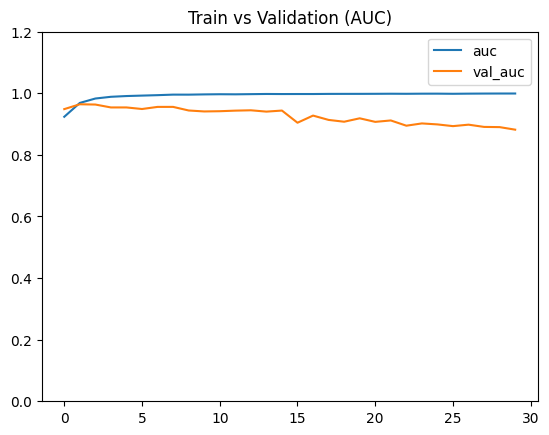

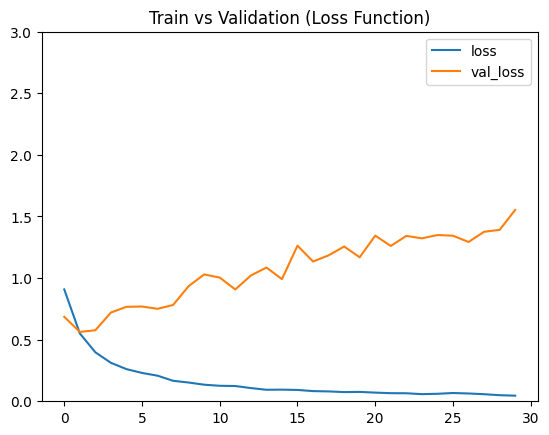

In [ ]:
# Plot Traning Results

history_imp_lstm[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
plt.ylim(0,1.2)
history_imp_lstm[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
plt.ylim(0,1.2)
history_imp_lstm[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,3)


In [ ]:
# Model Evaluation of train-set

y_pred_imp_lstm_train = np.argmax(imp_lstm.predict(X_train), axis=-1)

print(classification_report(y_train, y_pred_imp_lstm_train))

323/323 [==============================] - 7s 14ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1727
           1       1.00      1.00      1.00      1749
           2       1.00      0.98      0.99      1691
           3       0.95      0.96      0.95      1769
           4       0.94      0.94      0.94      1659
           5       1.00      1.00      1.00      1739

    accuracy                           0.98     10334
   macro avg       0.98      0.98      0.98     10334
weighted avg       0.98      0.98      0.98     10334



In [ ]:
# Perhitungan AUC
prob_imp_lstm_train = imp_lstm.predict(X_train)
auc_imp_lstm_train = roc_auc_score(y_train, prob_imp_lstm_train, multi_class='ovr')
auc_imp_lstm_train

323/323 [==============================] - 5s 16ms/step


0.9993729782155958

Observasi:
- berdasarkan metrics score, tingkat akurasi dari model ini sangat tinggi yaitu hingga 0.98. Selain itu tingkat pengklasifikasi perkategori cukup tinggi dengan nilai terendah yaitu 0.94.
- Tingkat AUC pada train-set dan validation-set memiliki nilai yang cukup tinggi yaitu 0.99 hal ini berarti model tidak dipengaruhi oleh threshold.
- loss cenderung stabil dikisaran 0.5. Hal ini berarti model belum konvergen

In [ ]:
# Model Evaluation of test-set

y_pred_imp_lstm = np.argmax(imp_lstm.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_imp_lstm))

68/68 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       369
           1       0.84      0.97      0.90       358
           2       0.83      0.69      0.76       327
           3       0.46      0.62      0.53       371
           4       0.52      0.30      0.38       350
           5       0.89      0.94      0.91       371

    accuracy                           0.75      2146
   macro avg       0.75      0.75      0.74      2146
weighted avg       0.75      0.75      0.74      2146



In [ ]:
# Perhitungan AUC
prob_imp_lstm = imp_lstm.predict(X_test)
auc_imp_lstm = roc_auc_score(y_test, prob_imp_lstm, multi_class='ovr')
auc_imp_lstm

68/68 [==============================] - 1s 13ms/step


0.9286449342436879

Observasi:
- Berdasarkan hasil dari prediksi, model ini dapat memprediksi kategori 0,1, dan 5 dengan sangat baik. Namun sangat buruk pada 3 dan 4.
- tingkat akurasi pada data test juga cukup rendah dibandingkan dengan prediksi train. Sehingga model ini tergolong overfit meskipun telah dilakukan improvement
- sementara itu, untuk tingkat akurasi 75% sudah cukup baik untuk mengklasifikasikan kelas tweet

### 9-3 Analisis Model


In [ ]:
# Pembuatan DF Act vs Pred
act_pred_imp_lstm = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_imp_lstm)
})
df_act_pred_imp_lstm = pd.concat([pd.DataFrame(X_test), act_pred_imp_lstm],axis=1)
df_act_pred_imp_lstm

tweet_processed  actual  prediction
7172   today society sensitive joke everything take j...       2           2
9239   difference calling black people coon calling b...       1           1
3799         expects unix logins github usernames rarely       4           3
12681  hurl girl went high school bullied married eve...       0           0
7251   going baltimore stupid fuck dumb niggers rioti...       1           1
...                                                  ...     ...         ...
2311   illuminati even branch called rape kill deny j...       2           2
1636   dear beloved legal department respectful bank ...       2           2
11756             jackleehi ions thanks evan nice source       3           3
9269   hahahaa well currently seeking mother figure e...       5           5
10975  wont renewing club membership support radical ...       5           5

[2146 rows x 3 columns]

Saya akan coba *plot confusion matrix* untuk mengecek kecenderungan prediksi model

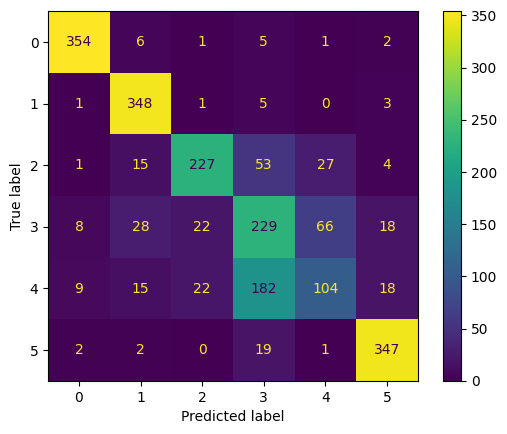

In [ ]:
# Confusion Matrix
cm_test_imp_lstm = confusion_matrix(y_test, y_pred_imp_lstm)
ConfusionMatrixDisplay(cm_test_imp_lstm).plot()

Observasi:
- Berdasrkan confussion matrix tersebut, yang paling sering terdeteksi salah adalah pada kategori 3 (not cyberbullying dan other cyberbullying)
- sementara untuk kesalahan prediksi pada kelas 3( sangat banyak data yang terdeteksi salah pada kelas 2 dan 4
- kesalahan pada kelas 4 banyak terprediksi salah pada kelas 2 dan kelas 3

## 10-Model Baseline GRU

Sebelum melakukan modeling, berikut adalah rules Model GRU, hampir sama seperti LSTM:

- Menggunakan sequencial API karena lebih simple dan hanya bekerja 1 arah sesuai urutan
- Hidden layer inisialisasi: 3 karena dataset cukup banyak. [`ref:choosing hidden layers`]('https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/')
  - Hiden layer 1: dense(32)
  - Hidden layer 2: dense(16)
  - Hiden layer 3: dense(8)

- activation (softmax) karena cepat konvergen dan digunakan untuk model multi-class
- input shape: 1 karena hanya memiliki 1 input `tweet text`
- output dense: 6 sesuai dengan jumlah kategori outputnya
- loss: categorical_crossentropy karena yang ditinjau adalah data kategorikal
- optimizer (adam) karena cepat konvergen
- ngrams= none untuk baseline
- menggunakan output embeddings=64 agar training menjadi lebih cepat.

### 10-1 Model Training

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Embedding Layer

embedding_baseline2 = Embedding(input_dim=num_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sentence
                      )

In [ ]:
# Penyusunan Model
model_baseline2 = Sequential()

# Layer Text Vectorization
model_baseline2.add(text_vectorization)

# Layer Embedding
model_baseline2.add(embedding_baseline2)

# Hidden Layer 1
model_baseline2.add(GRU(32, return_sequences=True))

# Hidden Layer 2
model_baseline2.add(GRU(16, return_sequences=True))

# Hidden Layer 3
model_baseline2.add(GRU(8))

# Layer Output
model_baseline2.add(Dense(6,activation='softmax'))

# Compile
model_baseline2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_baseline2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 72)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 72, 64)            1172800   
                                                                 
 gru (GRU)                   (None, 72, 32)            9408      
                                                                 
 gru_1 (GRU)                 (None, 72, 16)            2400      
                                                                 
 gru_2 (GRU)                 (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 6)                 54        
                                                        

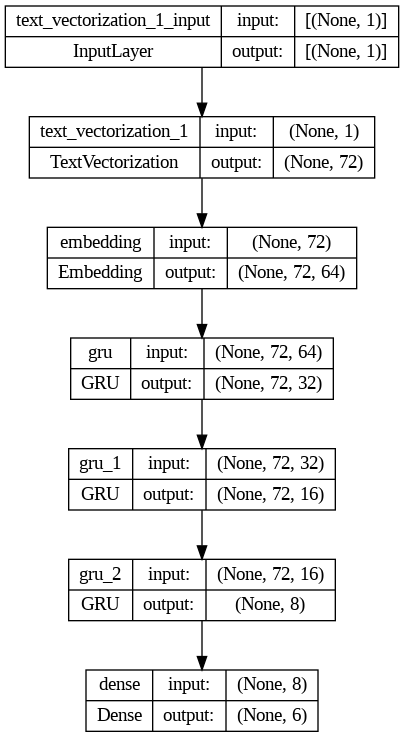

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_baseline2, show_shapes=True)

In [ ]:
# Train the Model
model_baseline2_hist = model_baseline2.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
323/323 [==============================] - 37s 93ms/step - loss: 1.7927 - accuracy: 0.1688 - auc: 0.4985 - val_loss: 1.7947 - val_accuracy: 0.1453 - val_auc: 0.4869
Epoch 2/30
323/323 [==============================] - 9s 29ms/step - loss: 1.7922 - accuracy: 0.1644 - auc: 0.5005 - val_loss: 1.7929 - val_accuracy: 0.1453 - val_auc: 0.4903
Epoch 3/30
323/323 [==============================] - 6s 18ms/step - loss: 1.7922 - accuracy: 0.1693 - auc: 0.5010 - val_loss: 1.7922 - val_accuracy: 0.1721 - val_auc: 0.4962
Epoch 4/30
323/323 [==============================] - 6s 17ms/step - loss: 1.7922 - accuracy: 0.1672 - auc: 0.4999 - val_loss: 1.7920 - val_accuracy: 0.1721 - val_auc: 0.4959
Epoch 5/30
323/323 [==============================] - 6s 18ms/step - loss: 1.7921 - accuracy: 0.1663 - auc: 0.4984 - val_loss: 1.7929 - val_accuracy: 0.1721 - val_auc: 0.4911
Epoch 6/30
323/323 [==============================] - 6s 20ms/step - loss: 1.7919 - accuracy: 0.1594 - auc: 0.5031 - val_los

### 10-2 Evaluasi Model

In [ ]:
# Create DataFrame

history_baseline2_df = pd.DataFrame(model_baseline2_hist.history)
history_baseline2_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  1.791709  0.170215  0.503780  1.792403      0.172149  0.496217
26  1.791689  0.159667  0.502281  1.792606      0.172149  0.494363
27  1.791724  0.168570  0.504131  1.792081      0.172149  0.496365
28  1.791646  0.169054  0.504267  1.792284      0.172149  0.496136
29  1.791678  0.169441  0.503443  1.792198      0.172149  0.492913

<Axes: title={'center': 'Train vs Validation (Loss Function)'}>

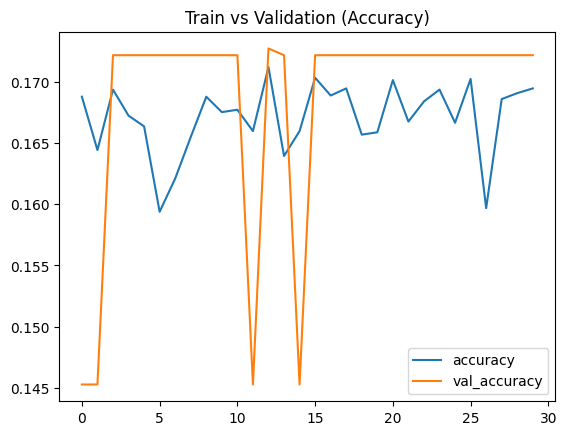

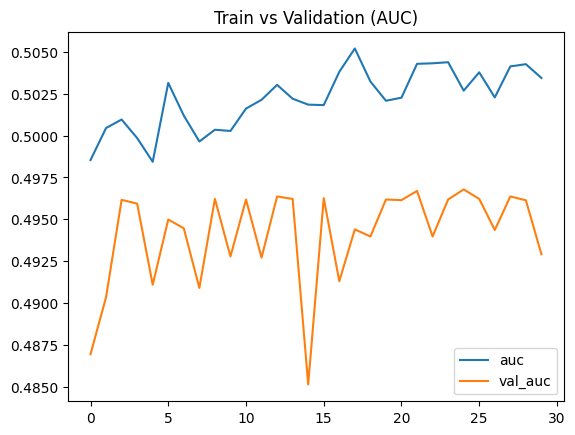

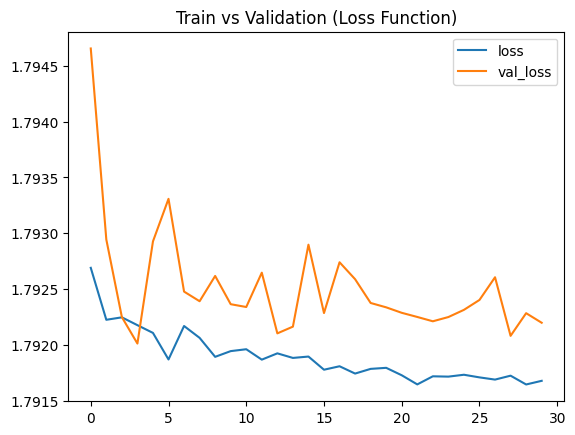

In [ ]:
# Plot Traning Results

history_baseline2_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
history_baseline2_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
history_baseline2_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')

In [ ]:
# Model Evaluation of train-set

y_pred_baseline2_train = np.argmax(model_baseline2.predict(X_train), axis=-1)

print(classification_report(y_train, y_pred_baseline2_train))

323/323 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1727
           1       0.00      0.00      0.00      1749
           2       0.00      0.00      0.00      1691
           3       0.17      1.00      0.29      1769
           4       1.00      0.00      0.00      1659
           5       0.00      0.00      0.00      1739

    accuracy                           0.17     10334
   macro avg       0.20      0.17      0.05     10334
weighted avg       0.19      0.17      0.05     10334



In [ ]:
# Perhitungan AUC
prob_baseline2_train = model_baseline2.predict(X_train)
auc_baseline2_train = roc_auc_score(y_train, prob_baseline2_train, multi_class='ovr')
auc_baseline2_train

323/323 [==============================] - 2s 6ms/step


0.5001274878232144

In [ ]:
# Model Evaluation of test-set

y_pred_baseline2 = np.argmax(model_baseline2.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_baseline2))

68/68 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.00      0.00      0.00       358
           2       0.00      0.00      0.00       327
           3       0.17      1.00      0.29       371
           4       0.00      0.00      0.00       350
           5       0.00      0.00      0.00       371

    accuracy                           0.17      2146
   macro avg       0.03      0.17      0.05      2146
weighted avg       0.03      0.17      0.05      2146



In [ ]:
# Perhitungan AUC
prob_baseline2 = model_baseline2.predict(X_test)
auc_baseline2 = roc_auc_score(y_test, prob_baseline2, multi_class='ovr')
auc_baseline2

68/68 [==============================] - 1s 7ms/step


0.5004018787729633

Observasi:
- Model gru baseline memiliki niali akurasi, auc loss yang naik turun tidak beraturan. Hal ini berarti model tersebut memiliki gradient explode.
- tingkat akurasi pada train set hanya sebesar 17%, hal ini berarti model sangat buruk dalam memprediksi data
- loss pada train set dan validation set memiliki nilai yang tinggi dan tidak stabil, hal ini berarti model tersebut belum konvergen.
- nilai auc sebesar 0.5, hal ini berarti model tidak dipengaruhi oleh threshold.
- baik dalam memprediksi data train dan test, kedua hal tersebut sama-sama tidak memiliki nilai prediksi yang baik dan overfit. Oleh karena itu perlu dilakukan improvement.

### 10-3 Analisis Model

In [ ]:
# Pembuatan DF Act vs Pred
act_pred_baseline2 = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_baseline2)
})
df_act_pred_baseline2 = pd.concat([pd.DataFrame(X_test), act_pred_baseline2],axis=1)
df_act_pred_baseline2

tweet_processed  actual  prediction
7172   today society sensitive joke everything take j...       2           3
9239   difference calling black people coon calling b...       1           3
3799         expects unix logins github usernames rarely       4           3
12681  hurl girl went high school bullied married eve...       0           3
7251   going baltimore stupid fuck dumb niggers rioti...       1           3
...                                                  ...     ...         ...
2311   illuminati even branch called rape kill deny j...       2           3
1636   dear beloved legal department respectful bank ...       2           3
11756             jackleehi ions thanks evan nice source       3           3
9269   hahahaa well currently seeking mother figure e...       5           3
10975  wont renewing club membership support radical ...       5           3

[2146 rows x 3 columns]

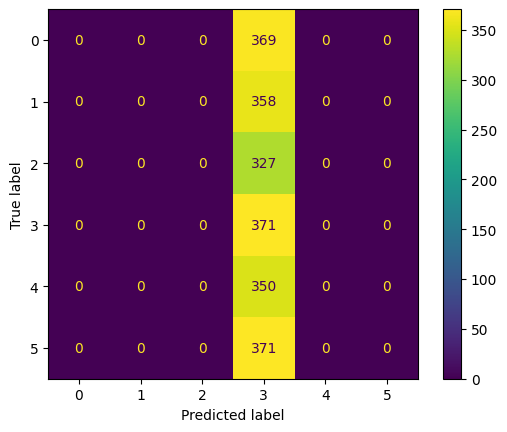

In [ ]:
# Confusion Matrix
cm_test_baseline2 = confusion_matrix(y_test, y_pred_baseline2)
ConfusionMatrixDisplay(cm_test_baseline2).plot()

Observasi:

- sama halnya dengan pemodelan pada lstm, model memprediksi data ke kategori 3 (not_cyberbullying)

## 11 - Model improvement GRU

Berdasarkan hasil pemodelan baseline GRU, sehingga perlu dilakukan improvement dengan rule sebagai berikut:

- Terlihat dari hasil train, validation dan test bahwa model baseline memiliki score yang rendah yang berarti model kurang belajar sehingga akan ditambah 2 hidden layer, menjadi 5 hidden layer.
- berdasarkan [machinelearningmastery]('https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/') penambahan layer bidirectional dapat meningkatkan performansi model karena layer tersebut akan membuat model belajar dari backward dan forward.
- pada baseline, neuron menggunakan geometric progression meningkat, namun pada baseline digunakan yang menurun agar model lebih banyak belajar.
- Embedding yang digunakan mengambil dari hasil training dari https://tfhub.dev/google/nnlm-en-dim50/2 yang memiliki [pre-trained text_embeddings](https://medium.com/codex/sentiment-analysis-with-tensorflow-hub-678c30ac79a2)

### 11-1 Model Training

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Layer Transfer learning
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2", output_shape=[],
                           input_shape=[], dtype=tf.string,trainable=False)


In [ ]:
# Penyusunan Model
model_gru_imp = Sequential()

# Layer Transfer Learning
model_gru_imp.add(hub_layer)

# Reshape Layer
model_gru_imp.add(tf.keras.layers.Reshape((50, 1)))

# Hidden Layer 1
model_gru_imp.add(tf.keras.layers.Bidirectional(GRU(256, return_sequences=True)))

# Hidden Layer 2
model_gru_imp.add(tf.keras.layers.Bidirectional(GRU(128, return_sequences=True)))

# Hidden Layer 3
model_gru_imp.add(tf.keras.layers.Bidirectional(GRU(64, return_sequences=True)))

# Hidden Layer 4
model_gru_imp.add(tf.keras.layers.Bidirectional(GRU(32, return_sequences=True)))

# Hidden Layer 5
model_gru_imp.add(tf.keras.layers.Bidirectional(GRU(16)))

# Layer Output
model_gru_imp.add(Dense(6,activation='softmax'))

# Compile
model_gru_imp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','AUC'])

# Summary
model_gru_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 reshape (Reshape)           (None, 50, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 512)          397824    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 256)          493056    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 128)          123648    
 nal)                                                            
                                                        

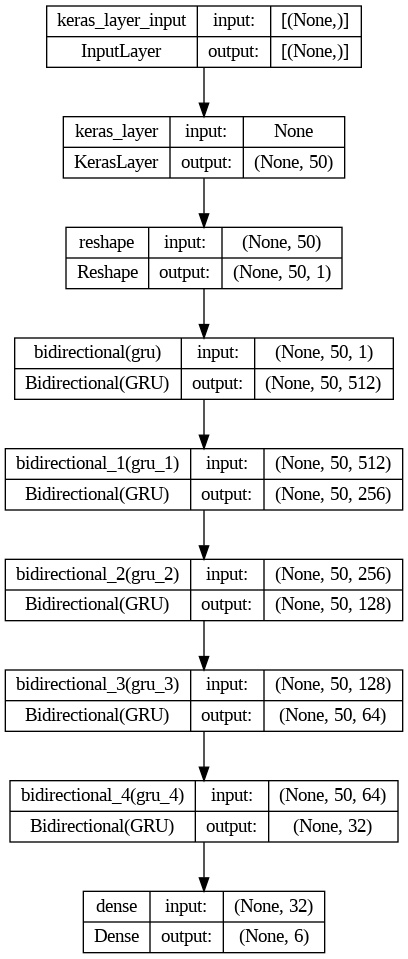

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_gru_imp,show_shapes=True)

In [ ]:
# Train the Model
model_gru_imp_hist =model_gru_imp.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
323/323 [==============================] - 31s 42ms/step - loss: 1.3388 - accuracy: 0.4739 - auc: 0.8101 - val_loss: 1.1901 - val_accuracy: 0.5274 - val_auc: 0.8559
Epoch 2/30
323/323 [==============================] - 18s 55ms/step - loss: 1.1102 - accuracy: 0.5706 - auc: 0.8743 - val_loss: 1.0791 - val_accuracy: 0.5773 - val_auc: 0.8815
Epoch 3/30
323/323 [==============================] - 10s 31ms/step - loss: 0.9936 - accuracy: 0.6118 - auc: 0.9000 - val_loss: 0.9669 - val_accuracy: 0.6140 - val_auc: 0.9053
Epoch 4/30
323/323 [==============================] - 14s 44ms/step - loss: 0.9163 - accuracy: 0.6377 - auc: 0.9152 - val_loss: 0.9012 - val_accuracy: 0.6393 - val_auc: 0.9180
Epoch 5/30
323/323 [==============================] - 10s 31ms/step - loss: 0.8729 - accuracy: 0.6529 - auc: 0.9229 - val_loss: 0.8792 - val_accuracy: 0.6327 - val_auc: 0.9212
Epoch 6/30
323/323 [==============================] - 14s 43ms/step - loss: 0.8280 - accuracy: 0.6699 - auc: 0.9307 - va

### 11-2 Evaluasi Model

In [ ]:
# Create DataFrame

history_gru_df = pd.DataFrame(model_gru_imp_hist.history)
history_gru_df.tail(5)

loss  accuracy       auc  val_loss  val_accuracy   val_auc
25  0.106607  0.963906  0.998724  1.564682      0.629386  0.884886
26  0.138812  0.949874  0.997624  1.487268      0.640351  0.889699
27  0.150793  0.945036  0.997334  1.548743      0.628838  0.885901
28  0.118693  0.956648  0.998284  1.544851      0.630482  0.886835
29  0.084579  0.970776  0.999103  1.590859      0.641996  0.888377

(0.0, 3.0)

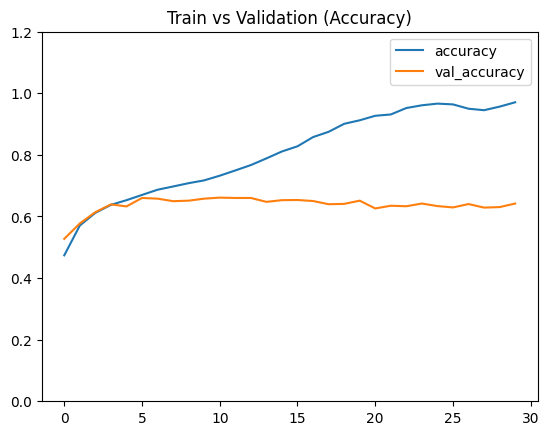

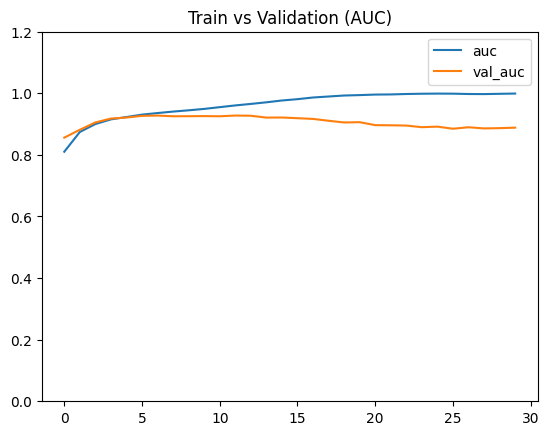

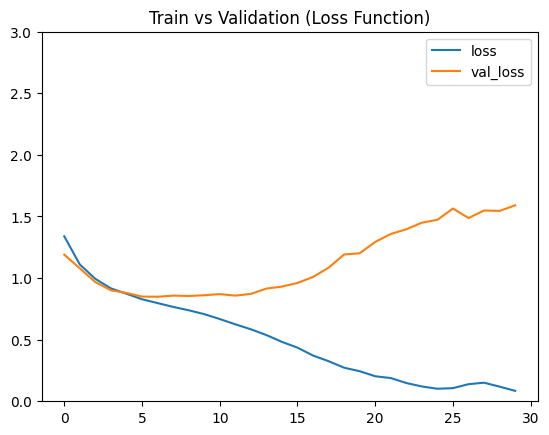

In [ ]:
# Plot Traning Results

history_gru_df[['accuracy', 'val_accuracy']].plot(title='Train vs Validation (Accuracy)')
plt.ylim(0,1.2)
history_gru_df[['auc', 'val_auc']].plot(title='Train vs Validation (AUC)')
plt.ylim(0,1.2)
history_gru_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,3)

In [ ]:
# Model Evaluation of test-set

y_pred_gru_train = np.argmax(model_gru_imp.predict(X_train), axis=-1)


print(classification_report(y_train, y_pred_gru_train))

323/323 [==============================] - 7s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1727
           1       1.00      1.00      1.00      1749
           2       1.00      0.98      0.99      1691
           3       0.96      0.94      0.95      1769
           4       0.93      0.96      0.95      1659
           5       1.00      1.00      1.00      1739

    accuracy                           0.98     10334
   macro avg       0.98      0.98      0.98     10334
weighted avg       0.98      0.98      0.98     10334



In [ ]:
# Perhitungan AUC
prob_gru_train= model_gru_imp.predict(X_train)
auc_gru_train = roc_auc_score(y_train, prob_gru_train, multi_class='ovr')
auc_gru_train

323/323 [==============================] - 4s 11ms/step


0.9993009577841887

In [ ]:
# Model Evaluation of test-set

y_pred_gru_imp = np.argmax(model_gru_imp.predict(X_test), axis=-1)


print(classification_report(y_test, y_pred_gru_imp))

68/68 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       369
           1       0.78      0.83      0.80       358
           2       0.67      0.57      0.61       327
           3       0.41      0.49      0.45       371
           4       0.37      0.36      0.37       350
           5       0.86      0.81      0.83       371

    accuracy                           0.65      2146
   macro avg       0.66      0.65      0.65      2146
weighted avg       0.66      0.65      0.65      2146



In [ ]:
# Perhitungan AUC
prob_gru_imp= model_gru_imp.predict(X_test)
auc_gru_imp = roc_auc_score(y_test, prob_gru_imp, multi_class='ovr')
auc_gru_imp

68/68 [==============================] - 1s 14ms/step


0.8957653558883426

Observasi:
- tingkat akurasi train memiliki nilai yang sangat tinggi yaitu, 98% sementara upada data test, tingkat akurasinya hanya mencapai 65%. Hal ini berarti pemodelan ini merupakan overfit.
- Selain itu, pada recall test kategori 4 (other_cyberbullying) memiliki nilai recall terendah yaitu sebesar 0.36. dan nilai tertinggi yaitu pada kategori 0 (age)
- nilai loss pada train set cenderung stabil dibawah 0.5, hal ini berarti pemodelan yang dibuat belum konvergen.

### 11-3 Analisis Model

In [ ]:
# Pembuatan DF Act vs Pred
act_pred_gru = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_gru_imp)
})
df_act_pred_gru = pd.concat([pd.DataFrame(X_test), act_pred_gru],axis=1)
df_act_pred_gru

tweet_processed  actual  prediction
7172   today society sensitive joke everything take j...       2           2
9239   difference calling black people coon calling b...       1           1
3799         expects unix logins github usernames rarely       4           3
12681  hurl girl went high school bullied married eve...       0           0
7251   going baltimore stupid fuck dumb niggers rioti...       1           1
...                                                  ...     ...         ...
2311   illuminati even branch called rape kill deny j...       2           4
1636   dear beloved legal department respectful bank ...       2           4
11756             jackleehi ions thanks evan nice source       3           2
9269   hahahaa well currently seeking mother figure e...       5           5
10975  wont renewing club membership support radical ...       5           5

[2146 rows x 3 columns]

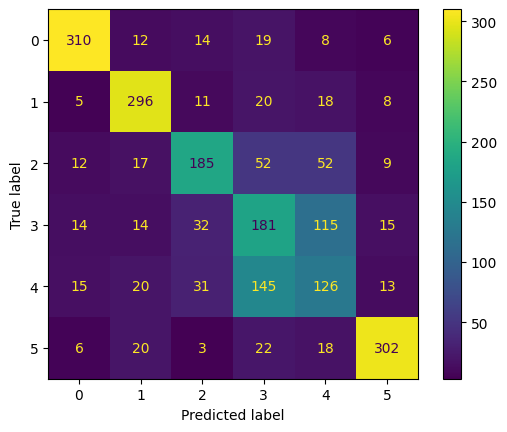

In [ ]:
# Confusion Matrix
cm_test_gru = confusion_matrix(y_test, y_pred_gru_imp)
ConfusionMatrixDisplay(cm_test_gru).plot()

Observasi:
- banyak model yang salah prediksi pada kelas 2,3,4(gender, not_cyberbullying, other_cyberbullying)
kesalahan tertinggi berada pada kategori ke 4(other_cyberbullying) terhadap kategori 3(not_cyberbullying) dan sebaliknya.
untuk kelas selain kelas 2, 3, dan 4 kesalahan prediksi berada dibawah 100 tweet per kategori.

## 12- Best Model

### 12-1 Evaluasi Best Model

In [ ]:
# Test Evaluation

train_accu = [accuracy_score(y_train, y_pred_train_baseline),accuracy_score(y_train, y_pred_baseline2_train), accuracy_score(y_train, y_pred_imp_lstm_train), accuracy_score(y_train, y_pred_gru_train)]
eval_accu = [accuracy_score(y_test, y_pred_baseline),accuracy_score(y_test, y_pred_baseline2), accuracy_score(y_test, y_pred_imp_lstm), accuracy_score(y_test, y_pred_gru_imp)]
eval_auc =[auc_baseline, auc_baseline2, auc_gru_imp, auc_gru_imp]
# Membuat Dataframe
eval_df = pd.DataFrame([train_accu, eval_accu, eval_auc], index=['Accuracy_train','Accuracy_test','AUC'], columns=['LSTM Baseline', 'GRU Baseline', 'LSTM Improvement', 'GRU Improvement (Transfer Learning)']).T
eval_df.round(2).sort_values(by= 'Accuracy_test', ascending=False)

Accuracy_train  Accuracy_test   AUC
LSTM Improvement                               0.98           0.75  0.90
GRU Improvement (Transfer Learning)            0.98           0.65  0.90
LSTM Baseline                                  0.17           0.17  0.49
GRU Baseline                                   0.17           0.17  0.50

Berdasarkan hal tersebut, pemodelan yang dipilih adalah **LSTM improvement** yang memiliki nilai hasil test tertinggi yaitu 75%. Meskipun tingkat model tersebut overfit. Berikut adalah karakteristik data FP dan FN sebagai berikut.

### 12-2 Evaluasi Perilaku FP dan FN

- age

In [ ]:
# Memisahkan DF untuk cek karakteristik
df_act_pred_imp_lstm['tweet_list'] = df_act_pred_imp_lstm['tweet_processed'].apply(lambda x:str(x).split())

# Pembagian FP dan FN
age_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=0) &(df_act_pred_imp_lstm['prediction']==0)]
age_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==0) &(df_act_pred_imp_lstm['prediction']!=0)]

# Top Words FP
topFP_age = Counter([item for sublist in age_type_imp1_FP['tweet_list'] for item in sublist])
topFP_age_list1 = pd.DataFrame(topFP_age.most_common(20))
topFP_age_list1.columns = ['Words','Count']

# Top Words FN
topFN_age = Counter([item for sublist in age_type_imp1_FN['tweet_list'] for item in sublist])
topFN_age_list1 = pd.DataFrame(topFN_age.most_common(20))
topFN_age_list1.columns = ['Words','Count']

In [ ]:
topFP_age_list1.T

0       1        2        3        4        5      6        7   \
Words  bully  school  schools  bullied  someone  thought  women  support   
Count      8       8        4        4        4        4      3        3   

         8         9      10     11        12    13     14     15      16  \
Words  goes  positive  thing  think  bullying  coon  maine  didnt  making   
Count     3         3      3      3         3     3      3      3       2   

             17    18     19  
Words  attitude  live  would  
Count         2     2      2

In [ ]:
topFN_age_list1.T

0      1       2      3     4        5     6     7      8     9   \
Words  school  bully  people  black  girl  bullied  head  game  white  boys   
Count       9      5       3      3     3        3     3     3      2     2   

         10    11    12    13        14    15        16        17    18     19  
Words  real  home  high  know  catholic  holy  bullying  remember  used  loved  
Count     2     2     2     2         2     2         2         1     1      1

Observasi:

- Berdasarkan grafik tersebut, kemungkinan kesalahan pada false positif dan false negatif adalah akibat dari kata school, bullying, school, bully, dll. kata-kata ini ada pada False Negatif maupun False Positif, sehingga model kesulitan untuk mengklasifikasikan data.

---



- Ethnicity

In [ ]:
# Memisahkan DF untuk cek karakteristik
ethnicity_type_imp1 = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==1) | (df_act_pred_imp_lstm['prediction']==1)]

# Pembagian FP dan FN
ethnicity_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=1) &(df_act_pred_imp_lstm['prediction']==1)]
ethnicity_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==1) &(df_act_pred_imp_lstm['prediction']!=1)]

# Top Words FP
topFP_ethnicity = Counter([item for sublist in ethnicity_type_imp1_FP['tweet_list'] for item in sublist])
topFP_ethnicity_list1 = pd.DataFrame(topFP_ethnicity.most_common(20))
topFP_ethnicity_list1.columns = ['Words','Count']

# Top Words FN
topFN_ethnicity = Counter([item for sublist in ethnicity_type_imp1_FN['tweet_list'] for item in sublist])
topFN_ethnicity_list1 = pd.DataFrame(topFN_ethnicity.most_common(20))
topFN_ethnicity_list1.columns = ['Words','Count']

In [ ]:
topFP_ethnicity_list1.T

0      1       2      3       4         5     6     7      8     9   \
Words  bully  black  course  first  people  feminazi  want  else  white  girl   
Count     10      7       5      5       5         5     4     4      4     4   

           10      11        12    13     14     15    16     17        18  \
Words  sexist  really  bullying  head  class  girls  know  cause  actually   
Count       4       4         4     4      3      3     3      3         3   

         19  
Words  stop  
Count     3

In [ ]:
topFN_ethnicity_list1.T

0      1       2        3      4      5      6         7     8   \
Words  white  first  racism  colored  women  suing  looks  anything  past   
Count      4      4       3        2      2      2      2         2     2   

          9     10          11    12      13     14      15                16  \
Words  black  wing  extremists  make  people  years  fought  disproportionate   
Count      2     2           2     2       2      1       1                 1   

             17          18         19  
Words  response  victimized  predators  
Count         1           1          1

Observasi:
- pada FN dan FP, kesalahan data akibat dari kata-kata pada kategori tersebut memiliki vocab yang sama seperti white, racism, black, colored.

---



- Gender

In [ ]:
# Memisahkan DF untuk cek karakteristik
gender_type_imp1 = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==2) | (df_act_pred_imp_lstm['prediction']==2)]

# Pembagian FP dan FN
gender_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=2) &(df_act_pred_imp_lstm['prediction']==2)]
gender_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==2) &(df_act_pred_imp_lstm['prediction']!=2)]

# Top Words FP
topFP_gender = Counter([item for sublist in gender_type_imp1_FP['tweet_list'] for item in sublist])
topFP_gender_list1 = pd.DataFrame(topFP_gender.most_common(20))
topFP_gender_list1.columns = ['Words','Count']

# Top Words FN
topFN_gender = Counter([item for sublist in gender_type_imp1_FN['tweet_list'] for item in sublist])
topFN_gender_list1 = pd.DataFrame(topFN_gender.most_common(20))
topFN_gender_list1.columns = ['Words','Count']

In [ ]:
topFP_gender_list1.T

0        1      2       3     4     5      6     7      8     9   \
Words  feminazi  another  bitch  coffee  know  real  girls  make  right  fair   
Count         5        4      4       3     3     3      3     3      3     2   

          10      11       12     13      14    15      16       17    18  \
Words  score  hahaha  friends  sleep  mother  ugly  saying  someone  look   
Count      2       2        2      2       2     2       2        2     2   

           19  
Words  nobody  
Count       2

In [ ]:
topFN_gender_list1.T

0      1         2      3      4     5        6     7     8     9   \
Words  sexist  women  feminazi  girls  woman  rape  thought  male  want  even   
Count      21     15        12      8      5     5        5     5     4     4   

           10     11     12    13    14         15       16    17      18  \
Words  better  every  never  stop  else  gamergate  nothing  fuck  people   
Count       4      4      4     4     3          3        3     3       3   

          19  
Words  still  
Count      3

Observasi:

- pada gender, kata-kata seperti feminazi, women, sexist berada di urutan awal yang menjadi pemicu terjadinya salah prediksi pada FN dan FP

---



- Not_cyberbullying

In [ ]:
# Memisahkan DF untuk cek karakteristik
nc_type_imp1 = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==3) | (df_act_pred_imp_lstm['prediction']==3)]

# Pembagian FP dan FN
nc_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=3) &(df_act_pred_imp_lstm['prediction']==3)]
nc_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==3) &(df_act_pred_imp_lstm['prediction']!=3)]

# Top Words FP
topFP_nc = Counter([item for sublist in nc_type_imp1_FP['tweet_list'] for item in sublist])
topFP_nc_list1 = pd.DataFrame(topFP_nc.most_common(20))
topFP_nc_list1.columns = ['Words','Count']

# Top Words FN
topFN_nc = Counter([item for sublist in nc_type_imp1_FN['tweet_list'] for item in sublist])
topFN_nc_list1 = pd.DataFrame(topFN_nc.most_common(20))
topFN_nc_list1.columns = ['Words','Count']

In [ ]:
topFP_nc_list1.T

0      1      2        3       4      5     6     7     8      9   \
Words  people  women  would  fucking  sexist  going  time  hate  know  bully   
Count      16     15     13       11      10     10    10     9     9      9   

          10        11    12     13       14     15    16    17    18      19  
Words  girls  bullying  yeah  still  looking  idiot  even  want  stop  school  
Count      8         8     8      7        7      6     6     6     6       6

In [ ]:
topFN_nc_list1.T

0         1      2      3       4     5     6      7       8     9   \
Words  bully  bullying  think  would  school  want  even  still  please  know   
Count     16         8      6      6       6     6     5      5       5     4   

                10       11       12      13    14    15    16    17       18  \
Words  freebsdgirl  morning  another  course  good  time  stop  high  twitter   
Count            4        4        4       4     4     4     4     4        4   

         19  
Words  talk  
Count     4

Observasi:

- kata-kata seperti bully, bullying, think, want, fucking menjadi penyebab terjadinya salah prediksi pada FN dan FP. Hal ini juga berarti lemmatization kurang akurat dalam menghilankan imbuhan ing/es.

- Other_Cyberbullying

In [ ]:
# Memisahkan DF untuk cek karakteristik
oc_type_imp1 = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==4) | (df_act_pred_imp_lstm['prediction']==4)]

# Pembagian FP dan FN
oc_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=4) &(df_act_pred_imp_lstm['prediction']==4)]
oc_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==4) &(df_act_pred_imp_lstm['prediction']!=4)]

# Top Words FP
topFP_oc = Counter([item for sublist in oc_type_imp1_FP['tweet_list'] for item in sublist])
topFP_oc_list1 = pd.DataFrame(topFP_oc.most_common(20))
topFP_oc_list1.columns = ['Words','Count']

# Top Words FN
topFN_oc = Counter([item for sublist in oc_type_imp1_FN['tweet_list'] for item in sublist])
topFN_oc_list1 = pd.DataFrame(topFN_oc.most_common(20))
topFN_oc_list1.columns = ['Words','Count']

In [ ]:
topFP_oc_list1.T

0         1          2       3     4     5      6      7     8   \
Words  think  feminazi  gamergate  sexist  male  know  bully  would  even   
Count      6         6          5       5     5     4      4      4     4   

           9     10     11           12    13    14    15      16    17    18  \
Words  better  talk  women  freebsdgirl  last  feel  fuck  tweets  many  time   
Count       4     4      4            3     3     3     3       3     3     3   

         19  
Words  stop  
Count     3

In [ ]:
topFN_oc_list1.T

0     1       2      3        4      5      6     7     8   \
Words  bully  know  people  going  fucking  idiot  would  hate  time   
Count     17    14      13     13       13     12     11     9     9   

             9        10        11       12      13     14    15     16    17  \
Words  bullying  someone  feminazi  looking  really  women  stop  think  yeah   
Count         8        8         8        7       6      6     6      6     6   

         18       19  
Words  look  without  
Count     5        5

Observasi:

- pada other_bullying, kata-kata seperti feminazi, women, sexist, bully berada di urutan awal. Kata-kata tersebut yang menyebabkan terjadinya salah prediksi pada FN dan FP. Kesamaan vocab antara keduanya, membuat mesin bingung untuk memprediksi kategori yang mana.

- Religion

In [ ]:
# Memisahkan DF untuk cek karakteristik
r_type_imp1 = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==5) | (df_act_pred_imp_lstm['prediction']==5)]

# Pembagian FP dan FN
r_type_imp1_FP = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']!=5) &(df_act_pred_imp_lstm['prediction']==5)]
r_type_imp1_FN = df_act_pred_imp_lstm[(df_act_pred_imp_lstm['actual']==5) &(df_act_pred_imp_lstm['prediction']!=5)]

# Top Words FP
topFP_r = Counter([item for sublist in r_type_imp1_FP['tweet_list'] for item in sublist])
topFP_r_list1 = pd.DataFrame(topFP_r.most_common(20))
topFP_r_list1.columns = ['Words','Count']

# Top Words FN
topFN_r = Counter([item for sublist in r_type_imp1_FN['tweet_list'] for item in sublist])
topFN_r_list1 = pd.DataFrame(topFN_r.most_common(20))
topFN_r_list1.columns = ['Words','Count']

In [ ]:
topFP_r_list1.T

0      1       2       3     4       5      6           7     8   \
Words  idiot  bully  muslim  people  says  idiots  quran  microbrain  isis   
Count     10      6       4       4     3       3      3           3     2   

         9       10     11     12      13    14    15     16    17        18  \
Words  come  racism  think  shame  throat  hate  care  suing  read  anything   
Count     2       2      2      2       2     2     2      2     2         2   

         19  
Words  past  
Count     2

In [ ]:
topFN_r_list1.T

0     1         2     3      4        5         6     7      8   \
Words  people  isis  positive  care  girls  example  attitude  live  think   
Count       6     5         3     3      3        3         2     2      2   

          9          10     11      12    13    14    15     16     17     18  \
Words  would  literally  quran  talmud  well  done  loss  kurds  mosul  white   
Count      2          2      2       2     2     2     2      2      2      2   

            19  
Words  indians  
Count        2

Observasi:

- pada religion, isis quran, muslim beradi di urutan ke 5 tingkat kesalahan FN dan FP tertinggi.

## 13 - Model Saving

Selanjutnya dilakukan penyimpanan model terbaik dan dilakukan freeze pada model tersebut agar tidak dapat diubah-ubah lagi datanya.

In [ ]:
# Summary
best_model= imp_lstm
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 72)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 72, 128)           2345600   
                                                                 
 bidirectional (Bidirectiona  (None, 72, 256)          263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 72, 128)          164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 72, 64)           41216     
 nal)                                                   

In [ ]:
# Freeze Model

best_model.trainable = False
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 72)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 72, 128)           2345600   
                                                                 
 bidirectional (Bidirectiona  (None, 72, 256)          263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 72, 128)          164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 72, 64)           41216     
 nal)                                                   

In [ ]:
#save model
best_model.save('modelling', save_format='tf')

In [ ]:
# Model Saving
with open('Vectorize.pkl', 'wb') as file_1:
  pickle.dump(Vectorize, file_1)

In [ ]:
#zip model
!zip -r modelling.zip modelling

  adding: modelling/ (stored 0%)
  adding: modelling/keras_metadata.pb (deflated 94%)
  adding: modelling/fingerprint.pb (stored 0%)
  adding: modelling/variables/ (stored 0%)
  adding: modelling/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: modelling/variables/variables.index (deflated 69%)
  adding: modelling/saved_model.pb (deflated 89%)
  adding: modelling/assets/ (stored 0%)


## 10-Model Inference

Model inference dikerjakan dinotebook [h8dsft_P2M2_desti_ratna_komala_inference.ipynb](https://github.com/H8-Assignments-Bay/p2-ftds020-rmt-ml2-destiratnakomala/blob/main/inference_h8dsft_P2M2_desti_ratna_komala.ipynb)

## 11- Kesimpulan

Berdasarkan analisis data yang telah dilakukan, model terbaik untuk memprediksi kategori tweet cyberbully adalah model LSTM improvement dengan tingkat akurasi sebesar 75%. Overfit yang terjadi pada pemodelan disebabkan oleh proses pre-proscessing yang kurang akurat, seperti tidak men-include not pada data, lematizer yang kurang baik karena banyak kata (bullying, bullied, bully) masih berada pada data hasil preprocessing.  Kesalahan dalam memprediksi kategori cyberbullying dapat membuat users komplain kepada pihak perusahaan. Dengan adanya model prediksi ini, diharapkan pengkategorian tweet dapat membantu mengurangi tingkat cyberbullying di twitter.